# **<font color=red> 🛑 이상을 탐지하는 여러 방법론들**
---
<font color=gray>※ 개념 및 Toy data 활용 실습 구성

> **(1) 통계적 기법**

> **(2) 거리·밀도 기반 이상 탐지**

> **(3) 분류 모델 기반 이상 탐지**

> **(4) 차원축소·시각화 기반 이상 탐지**

> **(5) 기업(twitter, amazone) 알고리즘 기반 이상 탐지**

> **(6) 시계열 분해 기반 이상 탐지**

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

## Ch01-(1). 🎯 3-sigma Rule 이상탐지
___

* 정의
<pre>
# SPC(Statistical Process Control, 통계적 공정관리), 경험적 규칙(empirical rule)
  (SPC 내의 알고리즘으로 경험적 규칙이라고도 할 수 있음)
# 표준편차의 3배인 3*Sigma(σ)의 범위가 전체 Data의 99.7%를 포함
# Data 전체의 산포를 파악하는 개념으로 많이 활용됨
# UCL(Upper Control Limit) / LCL(Lower Control Limit)
  (Tags: Shewhart Control Chart)
</pre>

<img src = "https://drive.google.com/uc?id=1iX8VeZrJADyEf1hwYiNb4JX2HhpBTra2">

<pre>
* 장단점
# [장점] 매우 구현하기 쉬움.
         (평균과 표준편차만 알면 됨.)
# [장점] 명확한 기준을 설정할 수 있기 때문에, 방법론에 재학습이 필요없음.
         (분포가 변하지 않는다는 가정이 필요함.)

# [단점] 정규분포가 가정되어야 함.
# [단점] 다차원 데이터에 적용하기 어려워 Feature간 상호관계를 파악하기 어려움.
# [단점] 데이터의 양이 충분하지 않다면, Outlier가 통계치에 영향을 미칠수도있음.
  
* 사용방법
# 데이터의 분포를 정규분포로 가정하고 평균과 표준편차를 계산
# 평균과 표준편차를이용하여 경계를 설정.(표준편차 x 시그마 계수σ)
# 경계를 벗어나면 Outlier라고 판단

* 적용사례
# 제조 공정 센서 데이터 이상탐지
# 제품 검사 및 측정 데이터 이상탐지 
</pre>

### Ch01-(1). ✍ Toy data 실습
___

In [2]:
# ▶ Toy data 생성
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df = pd.DataFrame({"name": ['KATE', 'LOUISE', 'JANE', 'JASON', 'TOM', 'JACK'], 
                   "weight": ['59', '61', '55', '66', '52', '110'], 
                   "height": ['160', '163', '155', '175', '94', '80']})
df

,name,weight,height
0,KATE,59,160
1,LOUISE,61,163
2,JANE,55,155
3,JASON,66,175
4,TOM,52,94
5,JACK,110,80


In [3]:
# ▶ data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   weight  6 non-null      object
 2   height  6 non-null      object
dtypes: object(3)
memory usage: 272.0+ bytes


In [4]:
# ▶ 숫자형 데이터로 변경
df['weight'] = df['weight'].astype(int)
df['height'] = df['height'].astype(int)

In [5]:
"""
현재의 데이터는 토이 데이터이므로 정규성 검사를 하지 않으나, 
실제 적용할 때는 정규성 검사가 꼭 필요하다.
"""
# ▶ UCL, LCL 생성
df['UCL_W'] = df['weight'].mean() + 2*df['weight'].std()
df['LCL_W'] = df['weight'].mean() - 2*df['weight'].std()

df['UCL_H'] = df['height'].mean() + 2*df['height'].std()
df['LCL_H'] = df['height'].mean() - 2*df['height'].std()

In [6]:
# ▶ data 확인
df

,name,weight,height,UCL_W,LCL_W,UCL_H,LCL_H
0,KATE,59,160,110.237152,24.096182,218.166805,57.499862
1,LOUISE,61,163,110.237152,24.096182,218.166805,57.499862
2,JANE,55,155,110.237152,24.096182,218.166805,57.499862
3,JASON,66,175,110.237152,24.096182,218.166805,57.499862
4,TOM,52,94,110.237152,24.096182,218.166805,57.499862
5,JACK,110,80,110.237152,24.096182,218.166805,57.499862


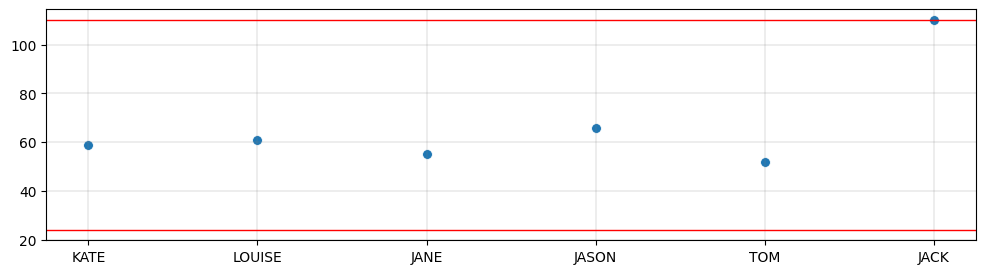

In [7]:
# ▶ weight plot 
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use(['dark_background'])
name = df['name'].values
weight = df['weight'].values

ucl_weight = float(df['UCL_W'][0])
lcl_weight = float(df['LCL_W'][0])

sns.scatterplot(x=name, y=weight, s=50);
plt.axhline(y=ucl_weight, color='r', linewidth=1)
plt.axhline(y=lcl_weight, color='r', linewidth=1)
plt.grid(color='gray', linewidth=0.2)
plt.gcf().set_size_inches(12, 3)

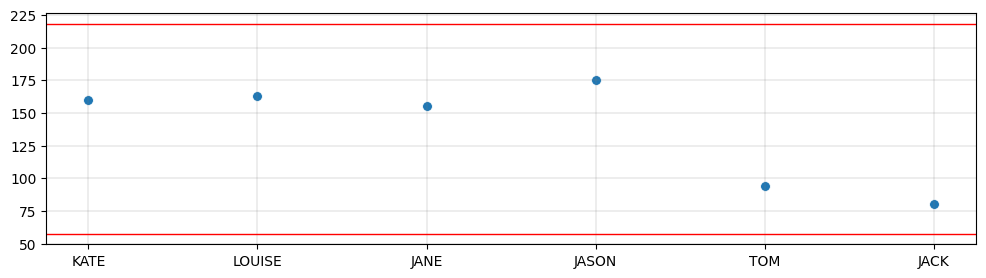

In [8]:
# ▶ height plot 
name = df['name'].values
height = df['height'].values

ucl_height = float(df['UCL_H'][0])
lcl_height = float(df['LCL_H'][0])

sns.scatterplot(x=name, y=height, s=50);
plt.axhline(y=ucl_height, color='r', linewidth=1)
plt.axhline(y=lcl_height, color='r', linewidth=1)
plt.grid(color='gray', linewidth=0.2)
plt.gcf().set_size_inches(12, 3)

## Ch01-(1). 🎯 Box plot 이상탐지
___
* 정의
```
# 최소 정상값(min), 1사분위수(Q1, 25분위수), 중앙값, 3사분위수(Q3 75분위 수), 최대 정상값(max)를 나타내는 시각화 방법
# 많은 데이터를 눈으로 확인하기 어려울 때 그림을 이용해 데이터 집합의 범위와 중앙값을 빠르게 확인할 수 있음.
```
<img src = "https://drive.google.com/uc?id=1pQT3D1JhZXEL5Cc79fZJAd5F3LORGezM">

<pre>
* 장단점
# [장점] 데이터를 눈으로 확인하기 어려울 때, 그림을 이용해 데이터의 범위를 빠르게 파악할 수 있음.
# [장점] 통계적으로 이상치(Outlier)가 있는지 확인 가능
# [장점] 다양한 정보를 손쉽게 표현할 수 있음.

# [단점] 위치정보에 기반하고 있기 때문에 분포를 확인하기는 어려움.
# [단점] 가운데 선은 평균이 아니다. 오해 소지가 있음(Median과 Mean은 다름.)

* 사용방법
# 주어진 데이터에서 각 사분위수를 계산(IQR계산)
# 그래프에서 제 1사분위수와 제 3사분위수를 기준으로 박스를 그리기
# 제 2사분위수에 해당하는 위치에 선을 표기
# 제 3사분위수에서 1.5*IQR을 더한 위치에 가로 선을 긎고 제 3사분위수부터 가로선까지 세로선 표기
# 제 1사분위수에서 1.5*IQR을 뺀 위치에 가로 선을 긎고 제 1사분위수부터 가로선까지 세로선 표기
# 4,5번에 그은 직선을 넘어서는 위치에 존재하는 값(Outlier)은 동그라미와 같은 기호로 표시

* 용어
# median - 중앙값
# IQR : 25% ~ 75%에 해당한 부분 
# 75th Percentile : 제 3사분위수
# 25th Percentile : 제 1사분위수
# Whisker : 최댓값, 최솟값
  (보통 수염이라고도 함)
# Outlier : 이상치 (Q3+1.5 IQR, Q1-1.5 IQR)

* 현업사례
# EDA 단계에서 많이 사용
# 제조 공정 센서 데이터 이상탐지
# 제품 검사 및 측정 데이터 이상탐지 

</pre>

### Ch01-(1). ✍ Toy data 실습
___

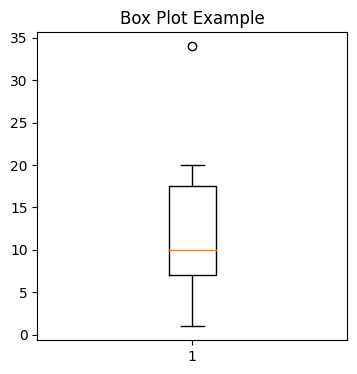

In [9]:
# ▶ Box plot 그려보기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

test = pd.DataFrame([1, 5, 9, 10 ,15, 20, 34])
fig, ax = plt.subplots(1,1, figsize=(4,4))
a = list(test[0])
box = ax.boxplot(a);
plt.title("Box Plot Example")
plt.show();

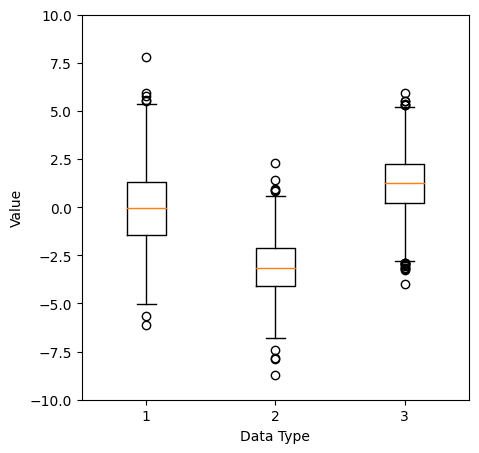

In [10]:
# ▶ Box plot 그려보기
import numpy as np

data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

labels = ['data_a', 'data_b', 'data_c']

fig, ax = plt.subplots(figsize=(5,5)) ;
box = ax.boxplot([data_a, data_b, data_c], whis=1.5);
ax.set_ylim(-10.0, 10.0);
ax.set_xlabel('Data Type');
ax.set_ylabel('Value');

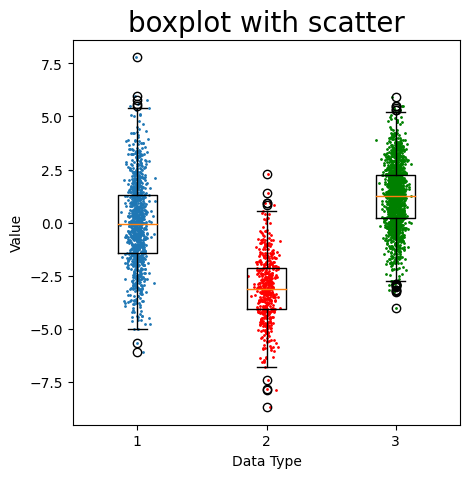

In [11]:
# ▶ Box plot, 분포를 확인하기 어려울 때 다음 Plot을 활용할 수 도 있으나, 추천은 하지 않는다.
fig, ax = plt.subplots(figsize=(5,5)) ;
box = ax.boxplot([data_a, data_b, data_c], whis=1.5);

data_a_df = pd.DataFrame(data_a)
data_b_df = pd.DataFrame(data_b)
data_c_df = pd.DataFrame(data_c)

# ▶ matplotlib을 이용하여 그 위에 각 점들을 찍어줌
for i, d in enumerate(data_a_df):
    y = data_a_df[d]
    x = np.random.normal(i + 1, 0.04, len(y))
    plt.scatter(x, y, s=1)

for i, d in enumerate(data_b_df):
    y = data_b_df[d]
    x = np.random.normal(i + 2, 0.04, len(y))
    plt.scatter(x, y, s=1, color='r')

for i, d in enumerate(data_c_df):
    y = data_c_df[d]
    x = np.random.normal(i + 3, 0.04, len(y))
    plt.scatter(x, y, s=1, color='green')

plt.title("boxplot with scatter", fontsize=20)
ax.set_xlabel('Data Type');
ax.set_ylabel('Value');
plt.show()

In [12]:
# ▶ Outlier 검출하기
def get_box_plot_data(labels: list, box_plot):
    rows_list = []
    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = box_plot['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = box_plot['boxes'][i].get_ydata()[1]
        dict1['median'] = box_plot['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = box_plot['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = box_plot['whiskers'][(i*2)+1].get_ydata()[1]
        dict1['Outlier'] = box_plot['fliers'][i].get_ydata()
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [13]:
# ▶ Box plot summary
labels = ['data_a', 'data_b', 'data_c']
fig, ax = plt.subplots(figsize=(5,5)) ;
box = ax.boxplot([data_a, data_b, data_c], whis=1.5);
plt.close(fig)    # Box Plot show 중복을 피하기 위함

get_box_plot_data(labels, box)

,label,lower_whisker,lower_quartile,median,upper_quartile,upper_whisker,Outlier
0,data_a,-5.025728,-1.420737,-0.045374,1.315311,5.384704,"[-6.113771269508421, -5.676108427511767, 5.595..."
1,data_b,-6.791572,-4.081894,-3.134438,-2.132598,0.568907,"[-7.82652763043774, -7.438479436866855, -7.880..."
2,data_c,-2.768244,0.204947,1.271199,2.229533,5.207115,"[-2.9010216918374425, -3.218996420979745, -3.0..."


In [14]:
# ▶ Box plot Outlier 객체 출력
# 현재는 데이터 A,B, C에 대해 총 3개의 Array가 나옴: 값만 출력됨.
fliers = [item.get_ydata() for item in box['fliers']]
fliers

[array([-6.11377127, -5.67610843,  5.59587457,  5.79765216,  5.50246561,
         5.95675125,  7.79124997]),
 array([-7.82652763, -7.43847944, -7.88067587, -8.6995848 ,  1.40690088,
         0.93865139,  0.90351245,  0.83739624,  2.27853001]),
 array([-2.90102169, -3.21899642, -3.04508055, -4.00960666, -2.96079726,
        -2.97875964, -2.92220362, -3.17389119, -2.88346757, -3.24758691,
        -3.1794705 ,  5.92054233,  5.30807297,  5.50559613,  5.49667965,
         5.38770903,  5.31072704])]

In [15]:
# 데이터 B의 이상치를 출력한다면
fliers[1]

array([-7.82652763, -7.43847944, -7.88067587, -8.6995848 ,  1.40690088,
        0.93865139,  0.90351245,  0.83739624,  2.27853001])

## Ch02-(1). 🎯 마할라노비스 거리(Mahalanobis Distance) 이상 탐지
___
* 정의
```
# 중심점까지의 거리를 기준으로 이상치를 식별하는 방법 
# Mahalanobis Distance(MD)를 사용하여 점과 분포 사이의 거리를 찾는 방법
# 기존에 알고있는 유클리드 거리에 공분산 계산이 더해진 개념 (※ 변수들간 Correlation을 고려)
# 변수의 공분산 행렬을 사용하여 데이터 점과 중심 사이의 거리를 찾음
# 다변량 데이터에서 매우 효과적으로 작동
# 
```
<img src = "https://drive.google.com/uc?id=1Oi_NNTLKETm0BKb81_CQ6XyQP4uHIHAB">

<pre>
* 장단점
# [장점] 대표적인 Centroid 방법론인 유클리드 거리와 달리 데이터의 분포 패턴을 기반으로 이상치를 감지
# [장점] 비선형 관계의 데이터에 활용 가능
# [장점] 데이터에 자체에 대한 가정이 필요 없음
  
# [단점] 변수간의 관계가 모두 독립이라면 유클리드 거리와 같은 개념
# [단점] 변수간의 상관성이 명확이 알려져 있지 않은 경우 적용하기 어려움
  
* 사용방법
# 일반적으로 outlier detection은 알려진 일정한 분포(gaussian distiributed)로부터 정상적인 데이터를 추정
# Covariance.EllipticEnvelolpe를 사용하여 공분산 추정을 하고, 중심 데이터들을 타원형에 fit
# Threshold(기준치)를 설정하고, Outlier를 검출

* 적용사례
# 일정한 품질로 제품을 생산하는 공정에서 이상 제품 탐지
# 2차전지(배터리), 태양열 Cell 등

</pre>

### Ch02-(1). ✍ Toy data 실습
___

In [16]:
import pandas as pd
import numpy as np
# ▶ 정규 분포를 이용하여 데이터 분포에 타원을 그림, 타원에서 벗어날수록 outlier로 판단함.
# ▶ 랜덤 데이터를 생성하는데 사용됩니다. 
# (※ 모든 방향으로 같은 성질을 가지는 정규분포를 이용해 가상 데이터 생성 클러스링 용 가상데이터를 생성하는데 사용)
from sklearn.datasets import make_blobs

# ▶ 랜덤 데이터 생성
X, _ = make_blobs(n_samples = 200,
                  n_features = 2,
                  centers = 1,
                  random_state = 1)

# ▶ 이상치 Input
X[0,0] = 5
X[0,1] = -5
pd.DataFrame(X).head(3)

,0,1
0,5.000000,-5.000000
1,-2.841878,3.740735
2,-2.217055,5.345659


In [17]:
from sklearn.covariance import EllipticEnvelope

# ▶ EllipticEnvelope 을 이용하여 outlier를 검출하기 위한 객체를 생성
# ▶ 데이터에서 이상치의 비율을 설정
# ▶ The amount of contamination of the data set, i.e. the proportion of outliers in the data set
# ▶ contamination must be in (0, 0.5]
outlier_detector = EllipticEnvelope(contamination=.5)

# ▶ EllipticEnvelope 객체를 생성한 데이터 학습
outlier_detector.fit(X)

# ▶ outlier를 검출
# ▶ +1 이면 boundary 안에 들어온 값으로 정상 데이터
# ▶ -1 이면 outlier로 간주
pred = outlier_detector.predict(X)
pred

array([-1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
        1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1])

In [18]:
# ▶ Raw data + Pred data
df = pd.DataFrame(X, columns=['col1', 'col2'])
df['outlier'] = pred
df.head(5)

,col1,col2,outlier
0,5.000000,-5.000000,-1
1,-2.841878,3.740735,-1
2,-2.217055,5.345659,1
3,-1.427065,5.089041,1
4,0.175158,4.970873,-1


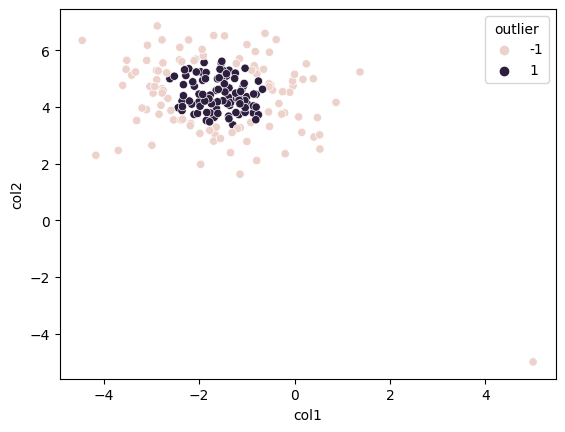

In [19]:
# ▶ Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='col1', y='col2', hue='outlier', data=df);

In [ ]:
# ▶ pyod 패키지 설치
# ! pip install pyod

## Ch02-(2). 🎯 KNN(K-Nearest_Neighbors) 이상 탐지
___
* 정의
```
# 거리가 가까운 'K'개의 데이터의 레이블을 참조하여 대상을 가장 가까운 유사 속성에 따라 분류하는 알고리즘
# 지도학습(Supervised Learning)에 한 종류로 거리 기반 분류 모델
```
<img src = "https://drive.google.com/uc?id=13U0rUJ2WwkR4s1HZvz_zwXtlScmfFW70" width="300" height="400">

<pre>
* 장단점
# [장점] 단순하고 효율적
# [장점] 기존 분류 체계 값을 모두 검사하여 비교하므로 높은 정확도를 보임.
# [장점] 수치 기반 데이터 분류 작업에서 성능 우수함.
# [장점] 기존 데이터를 기반으로 하기 때문에 데이터에 대한 가정이 없음.

# [단점] 기존의 모든 데이터를 비교해야 하기 때문에 데이터가 많으면 많을 수록 처리 시간이 증가 
# [단점] 특징과 클래스간 관계를 이해하는데 제한적
# [단점] 카테고리컬 데이터를 위한 추가 처리가 필요

* 사용방법
# PyOD(Python Outlier Detection) 패키지 활용, 이상탐지 알고리즘이 정리된 패키지
# K 개수 결정 (※ 이외에 다양한 Hyper parameter 결정)
# 표준화(Min-Max nomalization or z-score standardization)
# 새로운 Data에 대해 지속 수행

* 현업사례
# 이미지 처리
# 영상에서 글자 및 얼굴 인식
# 상품 추천
# 패턴 이식
# 이상 탐지

</pre>

### Ch02-(2). ✍ Toy data 실습
___

In [21]:
from pyod.utils.example import visualize
from pyod.utils.data import evaluate_print
from pyod.utils.data import generate_data
from pyod.models.knn import KNN

contamination = 0.1  # percentage of outliers
n_train = 200        # number of training points
n_test = 100         # number of testing points

# ▶ Generate sample data
X_train, X_test, y_train, y_test = generate_data(n_train=n_train,
                                                 n_test=n_test,
                                                 n_features=2,
                                                 contamination=contamination,
                                                 random_state=42)
# ▶ 생성된 Data set 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 2) (200,)
(100, 2) (100,)


In [23]:
# ▶ 모델 생성 및 학습
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [24]:
# ▶ Train set score
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

In [25]:
# ▶ Test set score
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

In [26]:
# ▶ ROC : 분류기 성능
# ▶ precision @ n : 예측한 것 중에 정답률

print("On Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)

print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

On Training Data:
KNN ROC:0.9992, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


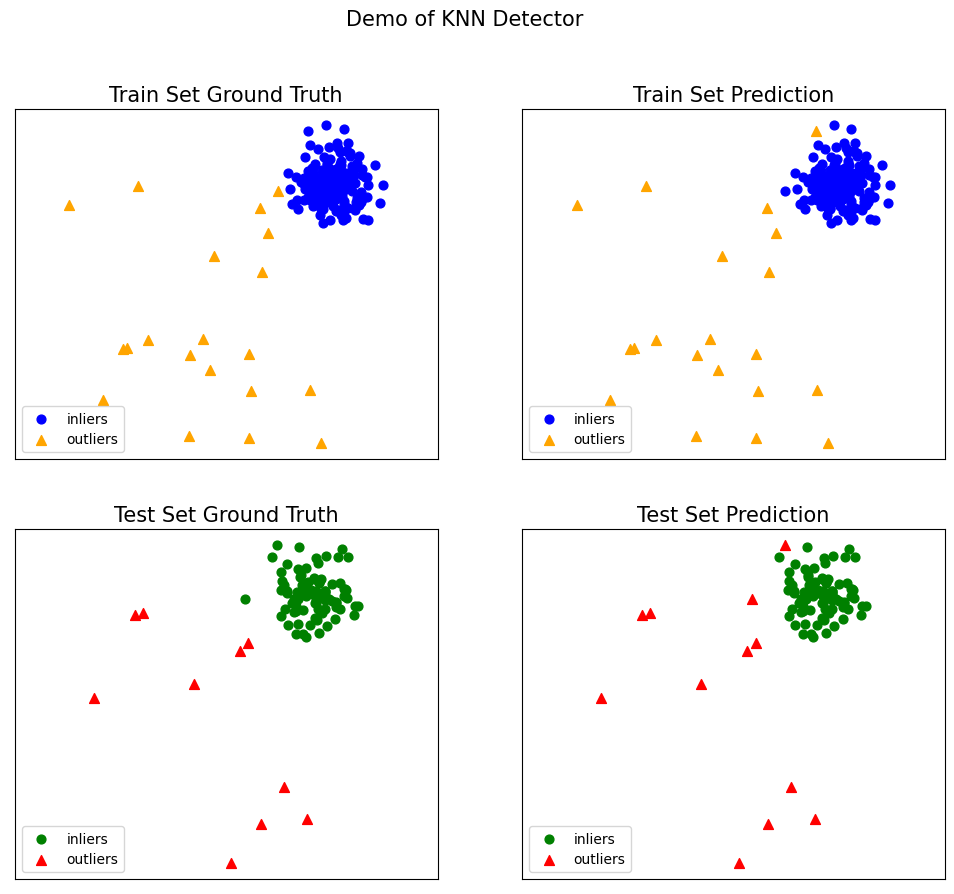

In [27]:
# ▶ visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## Ch02-(3). 🎯 LOF(Local Outlier Factor)  이상 탐지
___
* 정의
```
# Density-based Methods LOF
# 대부분의 이상탐지 알고리즘은 Global(전역) 관점에서 개별의 관측치가 이상인지 판별함
# 상위의 단점을 극복하기 위해, Local(국소적) 정보를 이용하여 이상인지를 판별함
# LOF는 관측치가 데이터 안에서 얼마나 벗어나 있는가에 대한 정도를 나타냄
# 'K' Hyper parameter를 통해 주변 데이터를 몇 개까지 고려할지를 결정
# LOF < 1 : 밀도가 높은 분포
# LOF = 1 : 이웃 관측치와 비슷한 분포
# LOF > 1 : 밀도가 낮은분포, 크면 클수록 이상치 정도가 큼
```
<img src = "https://drive.google.com/uc?id=1Oa2Han1oF7NILaq26sMTd4nf0bg9QioF">
<img src = "https://drive.google.com/uc?id=1f1ccNCWYhaNa75GnG2Nu3PSkGokpUfmA">

<pre>
* 장단점
  # [장점] 굉장히 밀집한 클러스터에서 조금만 떨어져 있어도 이상치로 탐지
  # [장점] KNN과 다르게 특별한 라벨링이 없어도 사용할 수 있음 
  # [장점] Local Outlier를 탐지할 수 있음
  # [장점] 데이터에 대한 가정이 필요 없음
  
  # [단점] 데이터의 차원수가 증가할 수록 계산량이 많음
  # [단점] 이상치 판단 기준 설정 어려움 (※ 밀집도가 다른 여러 클러스터가 존재한다면 민감하게 반응함)
  
* 사용방법
# sklearn.neighbors 패키지 활용
# n_neighbors 결정 (※ 이외에 다양한 Hyper parameter 결정)
# 표준화(Min-Max nomalization or z-score standardization)
# 새로운 Data에 대해 지속 수행

* 현업사례
# 공정(설비) 데이터 이상탐지
# 공정 센서 데이터 실시간 이상탐지

</pre>

### Ch02-(3). ✍ Toy data 실습
___

In [28]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# ▶ Toy data 생성
df_train = pd.DataFrame([[2, 1, 3],
                         [3, 2, 5],
                         [3, 4, 7],
                         [5, 5, 10],
                         [7, 5, 12],
                         [2, 5, 7],
                         [8, 9, 13],
                         [9, 10, 13],
                         [16, 15, 22], # ▶ 이상값 추가
                         [17, 16, 23], # ▶ 이상값 추가
                        ], columns=['hour', 'attendance', 'score'])

df_test = pd.DataFrame([[19, 12, 23],
                        [6, 10, 12],
                        [12, 14, 26]
                       ], columns=['hour', 'attendance', 'score'])

In [29]:
# ▶ 모델 생성 및 예측
# Train Data에 대해서만 적용하려면 LocalOutlierFactor(novelty=False).fit_train을 이용하면 됨.
outlier = LocalOutlierFactor(n_neighbors=5, contamination=0.2, novelty=True)
outlier.fit(df_train)
y_predict = outlier.predict(df_train)
df_train['outlier'] = y_predict

y_predict_test = outlier.predict(df_test)
df_test['outlier'] = y_predict_test

In [30]:
# ▶ LOF 값 확인
# ▶ negative_outlier_factor_ : The opposite LOF of the training samples.
# Inlier는 1에 가까운 LOF점수를 갖는 반면, Outlier는 매우 큰 점수를 갖는다.
outlier.negative_outlier_factor_

array([-1.061777  , -0.98818929, -1.00600816, -0.96280157, -0.96946595,
       -0.98818929, -1.05197608, -1.11181082, -1.79548722, -1.91952361])

In [31]:
# Train Test 병합
df_total = pd.concat([df_train, df_test], axis=0)
df_total.index = [i+1 for i in range(len(df_total))]
df_total.tail(5)

,hour,attendance,score,outlier
9,16,15,22,-1
10,17,16,23,-1
11,19,12,23,-1
12,6,10,12,1
13,12,14,26,-1


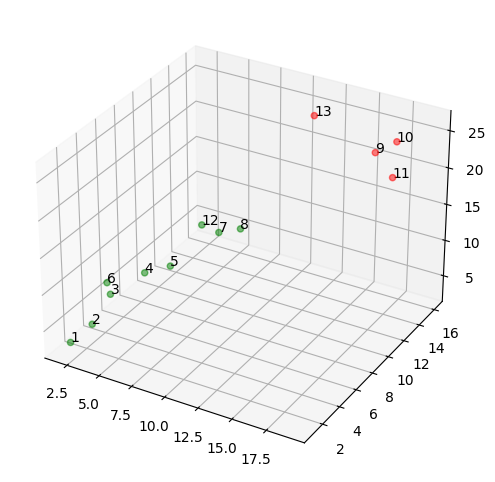

In [32]:
# ▶ 3D plot 및 확인: 병합 데이터 중
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

df_red = df_total[df_total['outlier']==-1]
df_green = df_total[df_total['outlier']==1]

ax.scatter(df_red['hour'], df_red['attendance'],df_red['score'], color = 'r', alpha = 0.5);
ax.scatter(df_green['hour'], df_green['attendance'],df_green['score'], color = 'g', alpha = 0.5)

for i in range(1, len(df_total)+1):
    x = float(df_total.at[i, 'hour'])
    y = float(df_total.at[i, 'attendance'])
    z = float(df_total.at[i, 'score'])
    ax.text(x=x,y=y,z=z, s=str(i))

## Ch03-(1). 🎯 Isoaltion Forest 이상 탐지
___
* 정의
```
# 의사결정나무(decision tree)를 기반으로 데이터 관측의 고립 정도 여부에 따라 이상치를 판별하는 이상탐지 기법
# Unsupervised Anomaly Detection
# 비정상 데이터라면 의사결정나무 루트(root)에서 가까운 단계에서 고립
# 정상 데이터라면 루트(root)에서 먼 단계에서 고립
# 특정 관측치가 고립되는 Leaf 노드까지의 거리를 Outlier Score로 정의
# 루트(root) 노드까지의 평균 거리가 짧을 수록 Outlier Score가 높아짐
```
<img src = "https://drive.google.com/uc?id=1tcAaNi2mAcdxj__gM_uzJBN221xMhuAM" width="450" height="200">
<img src = "https://drive.google.com/uc?id=15fCn00JASUkSO0dj7hM1TgpqJGGMKIld" width="400" height="">

<pre>
* 장단점
# [장점] 군집기반 이상탐지 알고리즘에 비해 계산량이 매우 적음 (※ Sampling 사용 Tree 생성)
# [장점] Anomaly Detection 성능 우수 (※ Robust)
# [장점] Train data에 이상치가 포함되지 않아도 잘 동작함 

# [단점] 분리를 위한 선을 수직과 수평으로만 자르기 때문에 잘못된 scoring이 발생할 수 있음 (※ 대안책 Extended Isolation Forest)

* Exetended Isolation Forest
# 개념 설명 블로그: https://woodyahn.tistory.com/70
# Extended Isolation Forest가 기존 Isolation Forest의 문제를 극복했음.
# Isolation Forest의 anomaly score 값을 비교
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FR5yS2%2FbtqEP2Sv4pg%2F3COkblZghakE234JrChPx1%2Fimg.png" width="450" height="200">

* 사용방법
# 먼저 데이터를 부분 샘플링 함 (max_samples로 그 갯수를 정의)

# from sklearn.ensemble import IsolationForest
# 데이터 현황(분포 및 특성) 파악
# Hyper-paramter 결정
# 학습 및 예측
# threshold 및 scoring 

* 적용사례
# 로그 데이터 이상탐지
# 품질관리를 위한 이상탐지
</pre>

### Ch03-(1). ✍ Toy data 실습
___

In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]    # 두 집단을 만들기 위함.
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test_normal = 0.2 * rng.randn(200, 2)
X_test_normal = np.r_[X_test_normal + 3, X_test_normal]    #  두 집단을 만들기 위함.
X_test_normal = pd.DataFrame(X_test_normal, columns = ['x1', 'x2'])

# Generating outliers
X_test_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_test_outliers = pd.DataFrame(X_test_outliers, columns = ['x1', 'x2'])

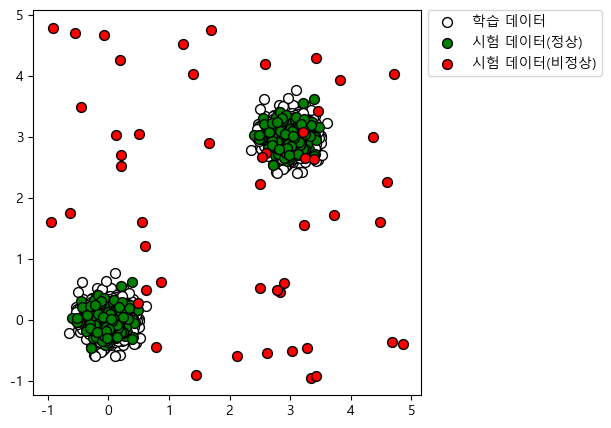

In [34]:
import matplotlib.pyplot as plt
plt.style.use(['default'])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.unicode_minus'] = False

# Train set
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=50, edgecolor='k', label='학습 데이터')

# Test set, 정상 Sample로 구성
p2 = plt.scatter(X_test_normal.x1, X_test_normal.x2, c='green', s=50, edgecolor='k', label='시험 데이터(정상)')

# Outlier set
p3 = plt.scatter(X_test_outliers.x1, X_test_outliers.x2, c='red', s=50, edgecolor='k', label='시험 데이터(비정상)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.915))
plt.gcf().set_size_inches(5, 5)
plt.show();

In [35]:
# Model 학습 및 예측
# - n_estimators : 의사결정나무(decision tree)의 개수 (※ default 100)
# - max_samples : 샘플링 데이터 개수 (※ 정수, 실수(0~1), 전체 데이터 개수 or 256 중 작은 수)
# - contamination : 전체 데이터에서 이상치의 비율, 이 비율에 따라 이상치로 판단하기 위한 score의 threshold를 정의
# - max_features : 학습 시 사용할 Feature (※ default 1, 모두 사용)

clf = IsolationForest(max_samples=100, contamination = 0.05, random_state=42)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test_normal = clf.predict(X_test_normal)
y_pred_test_outliers = clf.predict(X_test_outliers)

In [36]:
# Predict Value; -1 : Outlier / 1 : Normal
y_pred_test_normal[:5]

array([1, 1, 1, 1, 1])

In [37]:
# Score
# 음수이거나 낮을 수록 AbnormalOutlier임.
# 양수이거나 높을 수록 Normal(Inlier)임.
print(clf.decision_function(X_test_normal)[0:5])
clf.decision_function(X_test_outliers)[0:5]

[0.13520326 0.12503499 0.04709557 0.14023926 0.11374595]


array([-0.07397915, -0.10344893, -0.06839828,  0.00754778, -0.02594477])

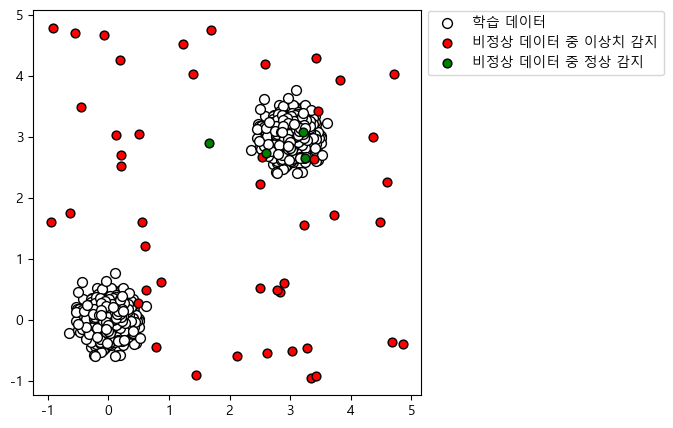

In [40]:
# Outlier Label 할당
X_test_outliers = X_test_outliers.assign(y=y_pred_test_outliers)    # DataFrame에 새 열을 할당함.

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=50, edgecolor='k', label='학습 데이터')

p2 = plt.scatter(X_test_outliers.loc[X_test_outliers.y == -1, ['x1']], 
                 X_test_outliers.loc[X_test_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label='비정상 데이터 중 이상치 감지')

p3 = plt.scatter(X_test_outliers.loc[X_test_outliers.y == 1, ['x1']], 
                 X_test_outliers.loc[X_test_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label='비정상 데이터 중 정상 감지')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.915))
plt.gcf().set_size_inches(5, 5)
plt.show();

In [41]:
# 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(y_pred_test_normal).count(1)/y_pred_test_normal.shape[0])

# Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(y_pred_test_outliers).count(-1)/y_pred_test_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.96
이상치 데이터셋에서 정확도: 0.92


## Ch03-(2). 🎯 One-Class SVM 이상 탐지
___
* 정의
<pre>
# 데이터를 N차원 좌표축으로 표현하고, 원점과의 거리를 기준으로 초평면(Hyper plane)을 그어 정상과 이상을 분류하는 이상탐지 방법
# Unsupervised Anomaly Deteciotn 중 하나의 기법
# SVM(Support Vector Machine)은 Binary-Classification에 활용되며 Support Vector 간의 Margine을 기준으로 Hyper Plane을 나눔
# 반면 OCSVM은 원점을 기준으로 정상과 이상에 대한 Hyper Plane을 찾는 방법임.
# 일반적으로 Linear Support Vector Machine을 이용하지만, 
# 영역의 구분이 복잡해지면 RBF(Radial Basis Functions)와 같은 커널 함수를 사용
# 선형으로 데이터를 분리할 수 없을때 RBF(방사형) 커널 활용
# Loss 함수 : min(Abnormal 데이터들과 Hyper Plane 사이의 거리)
</pre>

<img src = "https://drive.google.com/uc?id=1q1-76h31hhpwXrNMQ3ZyuBWX2xXcxFTF" width="300" height="100">

<pre>
* 장단점
# [장점] 데이터 Label이 존재하지 않아도 사용 가능
# [장점] 저차원이나 고차원의 적은 데이터에서 일반화 능력이 좋음
# [장점] 데이터 특성이 적어도 성능이 좋게 나오는 편, Robust 함
# [단점] Kernel 기반의 방법론, 데이터가 늘어날 수록 연산량이 크게 증가함
# [단점] Scaling에 민감함
# [단점] Hyper parameter 조절을 잘 해야 최적의 모델을 구할 수 있음
  
* 사용방법
# from sklearn import svm
# Hyper-paramter 결정 (※ Kernel, gamma, nu 등)
# 데이터 현황(분포 및 특성) 파악
# 학습 및 예측

* 적용사례
# 금융 이상 거래 탐지 
# 온라인 서명 검증 
</pre>

### Ch03-(2). ✍ Toy data 실습
___

In [42]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

rng = np.random.RandomState(42)
# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]    # 두 집단을 만들기 위함.
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test_normal = 0.2 * rng.randn(200, 2)
X_test_normal = np.r_[X_test_normal + 3, X_test_normal]    #  두 집단을 만들기 위함.
X_test_normal = pd.DataFrame(X_test_normal, columns = ['x1', 'x2'])

# Generating outliers
X_test_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_test_outliers = pd.DataFrame(X_test_outliers, columns = ['x1', 'x2'])

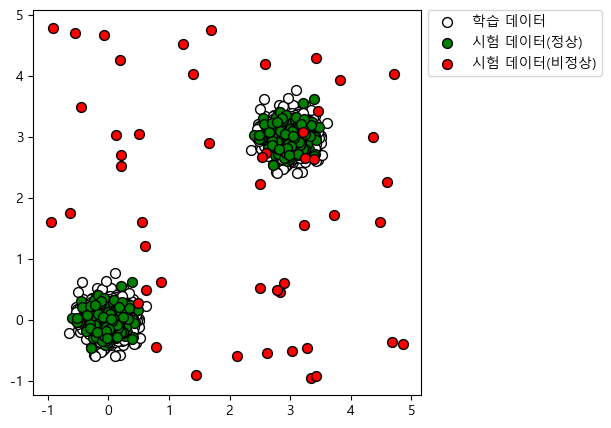

In [43]:
import matplotlib.pyplot as plt
plt.style.use(['default'])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.unicode_minus'] = False

# Train set
p1 = plt.scatter(X_train.x1, X_train.x2, c='white', s=50, edgecolor='k', label='학습 데이터')

# Test set, 정상 Sample로 구성
p2 = plt.scatter(X_test_normal.x1, X_test_normal.x2, c='green', s=50, edgecolor='k', label='시험 데이터(정상)')

# Outlier set
p3 = plt.scatter(X_test_outliers.x1, X_test_outliers.x2, c='red', s=50, edgecolor='k', label='시험 데이터(비정상)')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.915))
plt.gcf().set_size_inches(5, 5)
plt.show();

In [44]:
# 모델 학습 및 평가
# Kernel : Hyper plane의 종류 (Linear vs rbf)
# gamma : Support vector와의 거리, 크면 가까이 있는 데이터, 작으면 먼 데이터 참조
# nu : Hyper plane 밖에 있는(abnormal) data의 비율

clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test_normal = clf.predict(X_test_normal)
y_pred_test_outliers = clf.predict(X_test_outliers)

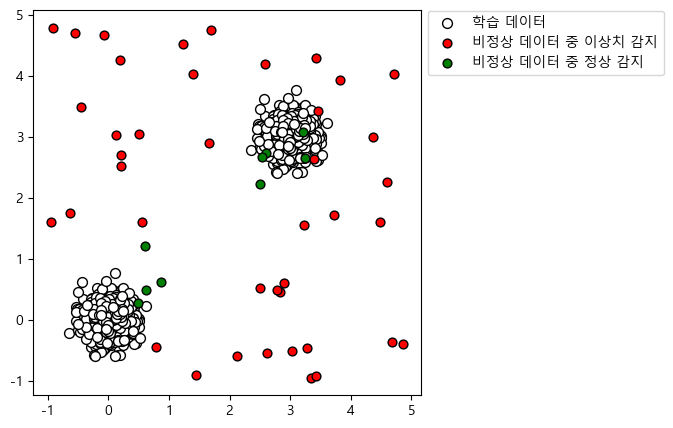

In [46]:
# Outlier Label 할당
X_test_outliers = X_test_outliers.assign(y=y_pred_test_outliers)    # DataFrame에 새 열을 할당함.

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=50, edgecolor='k', label='학습 데이터')

p2 = plt.scatter(X_test_outliers.loc[X_test_outliers.y == -1, ['x1']], 
                 X_test_outliers.loc[X_test_outliers.y == -1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label='비정상 데이터 중 이상치 감지')

p3 = plt.scatter(X_test_outliers.loc[X_test_outliers.y == 1, ['x1']], 
                 X_test_outliers.loc[X_test_outliers.y == 1, ['x2']], 
                 c='green', s=20*2, edgecolor='k', label='비정상 데이터 중 정상 감지')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.915))
plt.gcf().set_size_inches(5, 5)
plt.show();

In [47]:
# 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(y_pred_test_normal).count(1)/y_pred_test_normal.shape[0])

# Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(y_pred_test_outliers).count(-1)/y_pred_test_outliers.shape[0])

테스트 데이터셋에서 정확도: 0.9075
이상치 데이터셋에서 정확도: 0.82


## Ch03-(3). 🎯 Autoencoder 이상 탐지
___
<pre>
* 정의
# Autoencoder의 예측값과 측정값 간의 잔차 크기 여부에 따라 이상치를 판별하는 이상탐지 기법
# Unsupervised Anomaly Deteciotn 중 하나의 기법
# AutoEncode란 입력을 출력으로 복사하는 신경망
    - 데이터를 압축하는 부분을 인코더(Encoder)
    - 데이터를 복원하는 부분을 디코더(Decoder)
    - Latent Vector: 고차원의 입력 데이터의 차원 감축 벡터/모델(학습 데이터를 가장 잘 표현함)

</pre>

<img src = "https://drive.google.com/uc?id=1loR-rn4TixzAQQaepi23LDRPDS8S-0t3"  width="300" height="100">
<img src = "https://drive.google.com/uc?id=1NOu1PJd1meaqNDWAL19p2f-CAg6R9k4n"  width="300" height="100">

<pre>
* 장단점
# [장점] 데이터 Label이 존재하지 않아도 사용 가능
# [장점] 고차원에 데이터의 특징을 추출할 수 있음
# [장점] Auto encoder를 기반으로 다양한 알고리즘 존재 
# [단점] Hyper parameter (※ hidden layer) 설정이 어려움 
# [단점] Loss(MSE)에 대한 thresgold 설정이 어려움 
  
* 사용방법
# from pyod.models.auto_encoder import AutoEncoder
# 정상 Data 확보 
# Hyper-paramter 결정 (※ hidden layer)
# 학습 및 예측
# threshold 및 scoring 

* 적용사례
# 시계열 센서 데이터 이상 탐지
</pre>

### Ch03-(3). ✍ Toy data 실습
___

In [48]:
# Toy data 생성
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

contamination = 0.1  # percentage of outliers
n_train = 20000      # number of training points
n_test = 2000        # number of testing points
n_features = 300     # number of features

X_train, X_test, y_train, y_test = generate_data(n_train=n_train,
                                                 n_test=n_test,
                                                 n_features=n_features,
                                                 contamination=contamination,
                                                 random_state=42)

In [49]:
print(X_train[1][0:5])
print(y_train[0:5])

[6.98114644 4.97019307 7.24011768 5.21745055 5.01245767]
[0. 0. 0. 0. 0.]


In [50]:
# ▶ 모델 생성/학습 및 Hyper paramter 선정
clf_name = 'AutoEncoder'
clf = AutoEncoder(hidden_neurons =[300, 100, 100, 300], epochs=10, contamination=contamination)
clf.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               90300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               3

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[300, 100, 100, 300],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000022DFB581EA0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [51]:
y_train_pred = clf.labels_             # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# ▶ get the prediction on the test data
y_test_pred = clf.predict(X_test)              # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

63/63 [==============================] - 0s 2ms/step


In [52]:
# ▶ score가 높을 수록 Outlier에 가까움
y_train_pred[0:5], y_train_scores[0:5]

(array([0, 0, 0, 0, 0]),
 array([7.62305899, 8.30267711, 7.93873099, 8.2041506 , 7.26680014]))

In [53]:
y_test_pred[1950:2000], y_test_scores[1950:2000]

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 array([50.69246191, 50.0067115 , 50.5362792 , 46.77636981, 50.67067399,
        48.85971794, 48.39829955, 47.63786409, 51.31144478, 49.83028076,
        49.55891739, 47.66916255, 49.48055724, 48.96226838, 51.03635437,
        50.29337751, 51.52795095, 48.44067305, 50.76112587, 50.87896438,
        51.10142989, 50.01860628, 48.29199271, 48.93558663, 50.98667432,
        49.78944285, 48.45441191, 48.46862376, 48.67543611, 48.77289023,
        48.47400963, 51.05451252, 49.01776348, 49.09759327, 49.22614544,
        49.24151454, 50.71510344, 46.82803158, 50.68704177, 49.7261217 ,
        49.65441508, 50.29129355, 45.17645103, 50.59748485, 47.61135817,
        50.98883557, 48.68233647, 49.49493252, 50.18969706, 47.38402116]))

In [54]:
# ▶ Outlier 예측 데이터 수
import pandas as pd
pd.Series(y_train_pred).value_counts()

0    18000
1     2000
dtype: int64

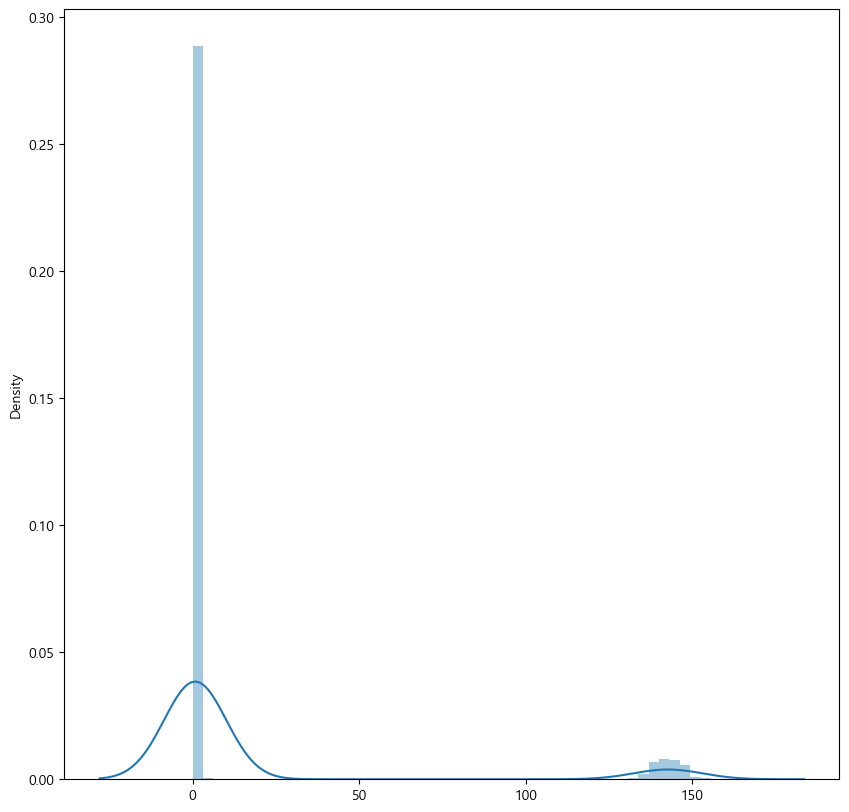

In [55]:
# ▶ threshold 결정을 위한 modified Z점수 표준화 (※ 이상치에 Robust한 표준화 방법)
import seaborn as sns
import numpy as np

def mod_z(col) :
    med_col = col.median()
    med_abs_dev = (np.abs(col - med_col)).median()
    mod_z = 0.7413 * ((col - med_col) / med_abs_dev)
    return np.abs(mod_z)

pd_s = pd.Series(y_test_scores);
mod_z = mod_z(pd_s);
sns.distplot(mod_z);

In [56]:
# ▶ 성능평가
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0

On Test Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0


## Ch04-(1). 🎯 PCA 이상 탐지
___
<pre>
* PCA 정의
# PCA: 여러 변수 간에 존재하는 상관관계를 이용하여 이를 대표한 주성분을 추출해 차원을 축소하는 기법
  - 차원 축소) 기존 데이터의 유실을 최소하 하기 위해 데이터의 분산을 최대화 할 수 있는 초평면(Hyper plane)을 찾고 데이터를 투영함
# Auto encoder와 작동원리가 비슷함
# 다중공선성을 제거하기 위해 각 벡터의 축이 직각이 되도록 투영 시킴
# 원본 데이터의 Feature 개수에 비해 매우 적은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법

</pre>

<img src = "https://drive.google.com/uc?id=16dNJTSMUiFmk4wQtJ7hP3HmL0wUy1vgP">

<pre>
* 장단점
# [장점] 고차원에 데이터를 저차원에 주성분으로 표현할 수 있음
# [장점] 선택한 변수들의 해석이 용이함

# [단점] 변수간 상관관계 고려가 어려움 
# [단점] 추출된 변수의 해석이 어려움 (※ 주성분, PC1/PC2 ...)
  
* 사용방법
# from sklearn.decomposition import PCA
# 데이터 정규화 필수
# 학습 데이터셋에서 분산이 최대인 축(axis)을 탐색
# 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 탐색
# 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 탐색
# 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 탐색

* 현업사례
# 다양한 검사 공정에서 이상 제품 탐지
# 데이터 EDA를 통한 클러스터링
</pre>

### Ch04-(1). ✍ Toy data 실습
___

In [57]:
# iris data set 로드 (Toy data)
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [58]:
# Data 확인 
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(['target'], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [60]:
# pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.729624
1,1,0.228508
2,2,0.036689
3,3,0.005179


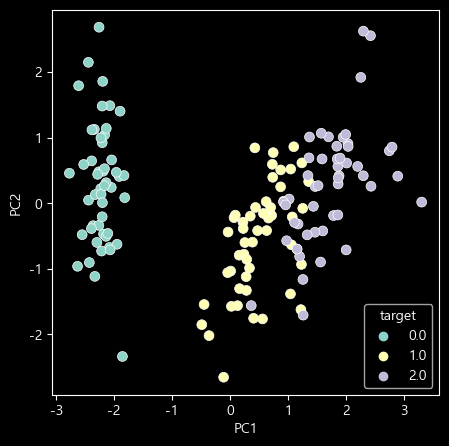

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

x=df.drop(['target'], axis=1).reset_index(drop=True)
y=df['target'].reset_index(drop=True).astype(str)

# 정규화
X_ = StandardScaler().fit_transform(x)

# 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)


pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
pc_df=pd.concat([pc_df,y],axis=1)

plt.rcParams['figure.figsize'] = [5, 5]
sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=50, linewidth=0.5);

# ▶ 각 클러스터 중심에서 멀리 떨어진 Data 일 수록 이상치

### Ch04-(1)-(1). 🎯 Hotelling's T2를 이용한 이상탐지
<pre>
장단점
# [장점] PCA의 잠재변수 축을 이용하여 거리기반의 이상탐지를 실시하기 때문에 직관적임.
# [장점] 사용하기 쉬움

# [단점] Threshold에따라 민감함.

사용방법
# PCA 통계치 산출
# Hotellings T2 산출
# Anomaly Detection
# 시각화 및 클러스터링

현업사례
# 다양한 공정에서 이상 탐지
</pre>

In [62]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]    # 두 집단을 만들기 위함.
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test_normal = 0.2 * rng.randn(200, 2)
X_test_normal = np.r_[X_test_normal + 3, X_test_normal]    #  두 집단을 만들기 위함.
X_test_normal = pd.DataFrame(X_test_normal, columns = ['x1', 'x2'])

# Generating outliers
X_test_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_test_outliers = pd.DataFrame(X_test_outliers, columns = ['x1', 'x2'])

In [63]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Create a PCA instance: pca
pca = PCA()
pca.fit(X_train_norm)

PCA()

In [64]:
# PCA를 이용하기 위한 통계치 산출
x_num = pca.n_features_                   # X 변수의 개수
lv_num = pca.n_components_                # 잠재변수의 개수(축소된 차원의 ㅁ수)
loading_p = pca.components_               # Loading P: PCA의 회귀벡터
t_score = pca.fit_transform(X_train_norm) # Score T: PCA의 잠재변수(축소된 차원)
t_std = []                                # Score T의 표준편차 계산
for i in range(lv_num):
    std = t_score[:, i].std()
    t_std.append(std)

# Calculate Hotellings T2
T2_df = (t_score / t_std) * (t_score / t_std)
t2 = 0
for i in range(lv_num):
    t2 += T2_df[:, i]

# Calculate T2 Limit
from scipy.stats import chi2
t2_limit = chi2.ppf(0.95, lv_num)

In [65]:
x_test_normal_norm  = scaler.transform(X_test_normal)
x_test_outlier_norm  = scaler.transform(X_test_outliers)

t_score_normal = np.dot(x_test_normal_norm, loading_p.T)
t_score_outlier = np.dot(x_test_outlier_norm, loading_p.T)

# Calculate Hotellings T2
T2_df_normal = (t_score_normal / t_std) * (t_score_normal / t_std)
t2_normal = 0
for i in range(lv_num):
    t2_normal += T2_df[:, i]

T2_df_outlier = (t_score_outlier / t_std) * (t_score_outlier / t_std)
t2_outlier = 0
for i in range(lv_num):
    t2_outlier += T2_df_outlier[:, i]

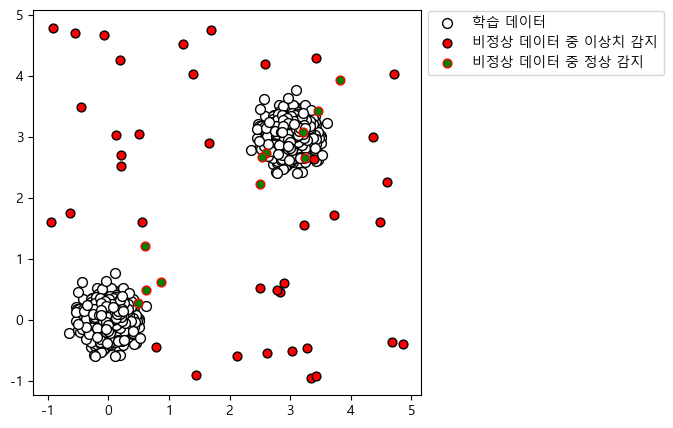

In [66]:
t2_detect_result_train = [1 if T2>t2_limit else 0 for T2 in t2]
t2_detect_result_normal = [1 if T2>t2_limit else 0 for T2 in t2_normal]
t2_detect_result_outlier = [1 if T2>t2_limit else 0 for T2 in t2_outlier]

import matplotlib.pyplot as plt
plt.style.use(['default'])
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['axes.unicode_minus'] = False

# Outlier Label 할당
X_test_outliers = X_test_outliers.assign(y=t2_detect_result_outlier)    # DataFrame에 새 열을 할당함.

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=50, edgecolor='k', label='학습 데이터')

p2 = plt.scatter(X_test_outliers.loc[X_test_outliers.y == 1, ['x1']], 
                 X_test_outliers.loc[X_test_outliers.y == 1, ['x2']], 
                 c='red', s=20*2, edgecolor='k', label='비정상 데이터 중 이상치 감지')

p3 = plt.scatter(X_test_outliers.loc[X_test_outliers.y == 0, ['x1']], 
                 X_test_outliers.loc[X_test_outliers.y == 0, ['x2']], 
                 c='green', s=20*2, edgecolor='r', label='비정상 데이터 중 정상 감지')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.915))
plt.gcf().set_size_inches(5, 5)
plt.show();

In [67]:
# 정상 data set을 얼만큼 정상으로 예측하였는지?
print("테스트 데이터셋에서 정확도:", list(t2_detect_result_normal).count(0)/len(t2_detect_result_normal))

# Outlier data set을 얼마나 Outlier로 예측하였는지?
print("이상치 데이터셋에서 정확도:", list(t2_detect_result_outlier).count(1)/len(t2_detect_result_outlier))

테스트 데이터셋에서 정확도: 0.9755
이상치 데이터셋에서 정확도: 0.78


## Ch04-(1). 🎯 t-SNE 이상 탐지
___
<pre>
* 정의
# PCA의 축소된 차원내에 밀집된 데이터들을 구별하기 위하여 등장함.
  (PCA는 선형 분석 방식으로 값을 투영하기 때문에 차원이 감소되면서 군집화 되어 있는 데이터들이 밀집됨)
# t-분포를 사용하여 데이터 유사도를 계산하고 이 값이 비슷한 데이터끼리 군집화
# t-분포를 이용하여 기준점과 상대점과의 거리를 기준으로 t-분포의 확률분포를 유사도(similarity)로 사용하여 표현
# 주로 시각화 Tool로 사용
</pre>

<img src = "https://drive.google.com/uc?id=1fiwBO7-GG0SuHmkrXYS36WXodGhWfRVN" width="300" height="270">
<img src = "https://drive.google.com/uc?id=1xuiR2Yhc1YgXNHdOFpSU5GsxJqdCEwjp" width="500" height="270">

<pre>
* 장단점
# [장점] PCA 대비 조금 더 고차원에 데이터를 저차원에 데이터로 클러스터링 하는데 유리 (※ 군집이 중복되지 않는 효과)
# [장점] 사용하기 쉬움
# [장점] 비선형 관계의 데이터를 군집화 할 수 있음

# [단점] 데이터의 개수가 많을 수록 연산량이 증가함
# [단점] 매번 돌릴 때마다 다른 시각화 결과가 도출됨
  
* 사용방법
# from sklearn.manifold import TSNE
# 데이터 정규화 필수
# Hyper parameter 선정
# 시각화 및 클러스터링

* 적용사례
# 다양한 검사 공정에서 이상 제품 탐지
# 데이터 EDA를 통한 클러스터링
</pre>

### Ch04-(1). ✍ Toy data 실습
___

In [68]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# ▶ 데이터셋 로드
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [69]:
from sklearn.manifold import TSNE

# ▶ class target 정보 제외
train_df = df[['sepal length', 'sepal width', 'petal length', 'petal width']]

# ▶ 2차원 t-SNE 임베딩
# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-10.362261,-17.996325
1,-10.796747,-20.459011
2,-9.702863,-20.615597
3,-9.906745,-20.916613
4,-9.887252,-17.883305
...,...,...
145,4.145441,16.275051
146,5.795549,13.549138
147,4.572157,15.476516
148,3.319782,16.707537


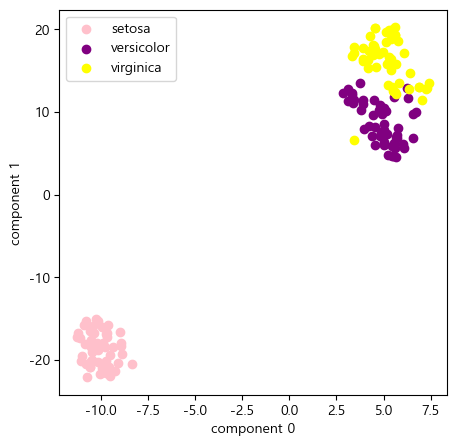

In [70]:
import matplotlib.pyplot as plt

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['target']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# ▶ target 별 시각화
plt.figure(figsize=(5,5))
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [71]:
# ▶ 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])
tsne_df

,component 0,component 1,component 2
0,13.259159,50.558792,-34.247494
1,123.744499,66.422981,-78.809311
2,108.214348,14.874807,-96.913376
3,91.592957,-29.269228,-110.754517
4,50.216839,2.216396,-121.197533
...,...,...,...
145,28.307734,-19.246401,74.554504
146,-9.612665,-46.550076,58.260113
147,-42.682175,-97.525627,-102.416954
148,111.325623,-57.801815,70.087448


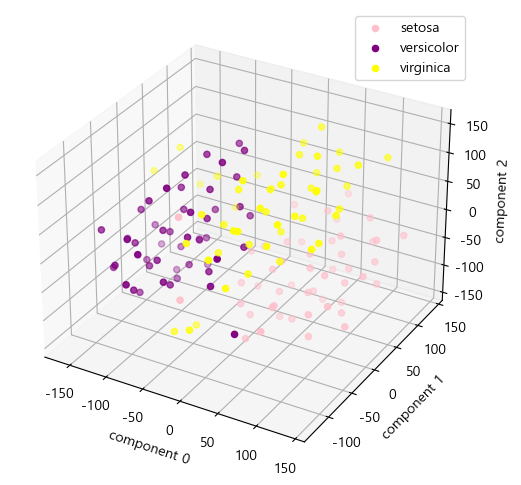

In [72]:
from mpl_toolkits.mplot3d import Axes3D

# ▶ 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['target']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

#  ▶ target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

## Ch05-(1). 🎯 Seasonal Hybrid ESD(S-H-ESD)
___
<pre>
* 정의

# SNS 서비스(트위터)는 기존의 통계적 방법론들을 조합하여 시계열의 이상값을 탐지하는 방법을 제안
# Contextual Anomaly(시계열 동적 이상탐지) 방법 중 하나임.
# 기존의 평균, 표준편차를 이용하는 방식은 Outlier를 포괄하여 계산하므로 이상값에 취약
# 평균과 표준편차가 seasonality, trend 등에 의해 변환되어 Outlier를 놓치게 되는 경우 발생
 
🔻 핵심 개념 🔻
(1) Median Absolute Deviation(MAD): 관측값에서 중앙값을 뺀 값들의 중앙 값, 이상치에 덜 영향을 받는 robust한 분산 측정법
(2) ESD test(Grubb's test): 단일 이상치를 테스트 하는 통계적 방법, 평균에서 얼마나 멀어져있는지를 데이터의 분산과 대비하여 탐색
(3) Generalized ESD: ESD는 하나의 이상치만 발견, 여러 개의 Outlier를 탐색, 계절성 고려하지 못한다는 단점 존재
(4) STL: 시계열 데이터에서 계절성, 추세, 잔차 세가지 패턴요소로 분해하는 기법, 이상탐지에 적합한 residual만 고려
</pre>
<pre>S-H-ESD가 잘 탐지하는 데이터의 예시</pre>
<img src = "https://drive.google.com/uc?id=16DJ_NbGq5vJNjj90ZAiR__t2rqthTnfb" width="500" height="300">

<pre>S-H-ESD가 잘 탐지하지 못하는 데이터의 예시</pre>
<img src = "https://drive.google.com/uc?id=181agHYMlTGbipqOIYa08iAZ908j-RTVL" width="500" height="300">


<pre>
* 장단점
# [장점] 노이즈에 어느정도 대응할 수 있음.(More noise)
# [장점] 급작스런 상승, 급등점을 탐지할 수 있음.(Sudden grow; spike)
# [장점] 값이 하강하는 점에 대해서도 탐지할 수 있음.(Break down)
# [장점] 보이지 않던 희귀 값 (Activity when usually none)

# [단점] 단변량 데이터에만 적용가능함.
# [단점] 이상 탐지가 안 되는 경우가 아래와 같이 존재함.
          - 점진적 증가 신호(seasonal grow)
          - 점진적 증가하는 신호에서의 음의방향 이상치 (Negative seasonal anomaly)
          - 평면적 신호 (Flat signal)

* 사용방법
# !pip install pyculiarity
# from pyculiarity import detect_ts
# 시간 데이터 타입 변경
# 시각화 및 클러스터링

* 현업사례
# SNS 이상 탐지
</pre>

### Ch05-(1). ✍ Toy data 실습
___

In [73]:
# 🔻 package 설치
# !pip install pyculiarity

In [74]:
# Toy data 생성
# Outlier data 삽입 (1000, 1200, 1300)
import numpy as np
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,
       317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,
       318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,380, 
       319,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,318.87,319.25,320.13,
       321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,
       322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,
       322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,
       322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,
       320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,
       319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,
       321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,
       324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,
       326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,
       328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,
       330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,
       331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,
       334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,
       336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,
       337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,
       337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,
       337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,
       336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,348.07,349.12,350.55,351.34,350.80,349.10,347.54,346.20,346.20,347.44,348.67,
       349, 350, 351, 250, 265, 354]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")

# date를 숫자형태(int64)로 변환해야만 해당 알고리즘이 실행됨
co2 = pd.DataFrame(co2).reset_index()
co2.columns = ['Time', 'CO2']
co2['Time'] = np.int64(co2['Time'])
co2.head()

,Time,CO2
0,1643587200000000000,315.58
1,1646006400000000000,316.39
2,1648684800000000000,316.79
3,1651276800000000000,317.82
4,1653955200000000000,318.39


In [75]:
from pyculiarity import detect_ts
from pyculiarity.date_utils import date_format
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# max_anoms: Maximum number of anomalies that S-H-ESD will detect as a percentage of the
# 참조 : https://github.com/zrnsm/pyculiarity/blob/master/pyculiarity/detect_ts.py
results = detect_ts(co2, direction='both')
results

{'anoms':                                timestamp  anoms
 timestamp                                      
 1743379200000000000  1743379200000000000  380.0
 2571696000000000000  2571696000000000000  250.0
 2574374400000000000  2574374400000000000  265.0,
 'plot': None}

In [76]:
# """ Plotting """
# reformat the index and columns
timeS_DF = co2.set_index('timestamp')

anomsDF = results['anoms']
anomsDF.drop(['timestamp'], axis = 1, inplace = True)
anomsDF['is_anom'] = True
# anomsDF.columns = ['anom_value','is_anom']

merged_DF = pd.merge(left = timeS_DF, right= anomsDF, left_index=True, right_index=True, how = 'left')
# 시간 형태 변경
merged_DF.index = pd.to_datetime(merged_DF.index)

print('>>> the number of anomaly: ', len(results['anoms']))
print(results['anoms'].head())

>>> the number of anomaly:  3
                     anoms  is_anom
timestamp                          
1743379200000000000  380.0     True
2571696000000000000  250.0     True
2574374400000000000  265.0     True


In [77]:
merged_DF.tail()

,value,anoms,is_anom
timestamp,,,
2051-04-30,350.0,NaN,NaN
2051-05-31,351.0,NaN,NaN
2051-06-30,250.0,250.0,True
2051-07-31,265.0,265.0,True
2051-08-31,354.0,NaN,NaN


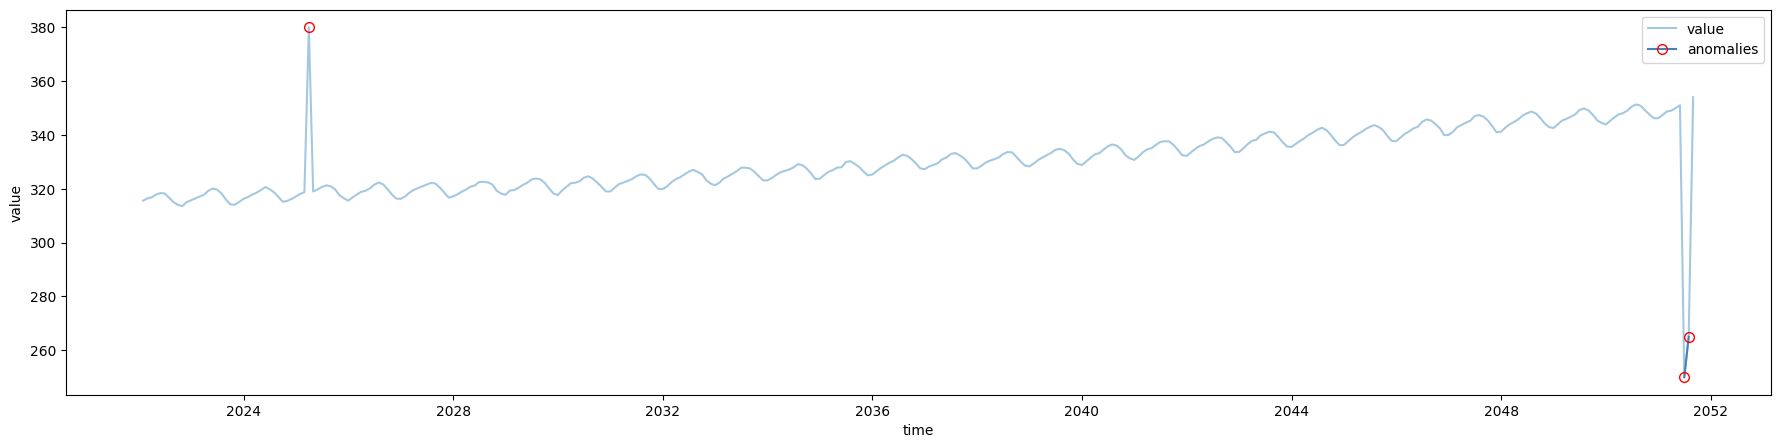

In [78]:
# ▶ plot 및 outlier marking
# anomaly detection을 위한 plot 함수
def plot_ts_anoms(inDF, savepath):
    fig = plt.figure(figsize = (22,5))
    plt.plot(inDF.index, inDF['value'], alpha=0.4, label ='value')
    plt.plot(inDF.index, inDF['anoms'],  color='steelblue', alpha=1, marker='o', markersize='7',
                markeredgewidth = 1, markerfacecolor='None', markeredgecolor='red',label='anomalies')
    if 'expected_value' in inDF.columns:
        plt.plot(inDF.index, inDF['expected_value'], color = 'c', marker = '^', markersize = '7',
                 markeredgewidth = 1, markerfacecolor='None', markeredgecolor='c',label='expected_value')

    plt.legend(); plt.xlabel('time');plt.ylabel('value')
    
plt.style.use(['default'])
plot_ts_anoms(merged_DF, 'a')

아래의 데이터같은 경우는 잘 대응하였다.
<img src = "./imgs/shesd_result1.png" width="550" height="100">
아래의 데이터 같은 경우는 잘 대응하지 못하였다.
<img src = "./imgs/shesd_result2.png" width="550" height="100">
아래의 데이터같은 경우는 잘 대응하지 못했다.
<img src = "./imgs/shesd_result3.png" width="550" height="100">
아래의 데이터와 같은 경우는 잘 대응하였다.
<img src = "./imgs/shesd_result4.png" width="550" height="100">

위를 보면, 데이터가 점진적으로 증가하는 경우에는 어느 정도의 범위를 벗어나야만 이상치 식별이 가능한 것으로 보임.

## Ch05-(2). 🎯 RRCF(Robust Random Cut Forest)
___
<pre>
* 정의
# 트리 기반 이상 감지 모델로 Isolation Forest와 작동 방식은 유사함.
# Isolation Forest와의 차이는 Tree 분기 시 각 feature가 갖는 값의 범위에 따라 확률을 다르게 부여하여 선택함.
  분산이 큰 변수를 우선 분기시키는 것

# 시간에 따라 분포가 점점 달라지는 데이터에 대응하여 트리를 만들 수 있게 됨 (※ streaming data)
# 새로운 데이터 들어올 시, 재학습이 아닌 node 추가/제거 알고리즘을 통해 모델 업데이트
# 평균 분기 횟수(Isolation Forest의 Score) 대신, Collusive displacement (CoDisp)라는 새로운 이상 스코어를 사용
# CoDisp: 이상 데이터를 삭제 했을 때, 남은 데이터에서 발생하는 depth 변화
  (아래 그림의 빨간색 화살표의 길이)
# CoDisp 값이 클 수록 이상 데이터로 간주
</pre>
<pre>Isolation Forest는 이상치 전 사전 활동이 감지되지 않음.</pre>
<img src = "https://drive.google.com/uc?id=1HRptCVo2GG8lyd-bjjooNyBkt1dMXTTo" width="500" height="">
<pre>Isolation Forest는 이상치 전 사전 활동이 감지됨.</pre>
<img src = "https://drive.google.com/uc?id=1wt1y9osr1XQZcd_44WR5-CNo_eJyWB0f" width="500" height="">


<pre>
* 장단점
# [장점] 분포가 변화하는 Streaming data에 유리함
# [장점] Batch 및 Streaming data 모두 활용 가능
# [장점] Subsampling을 통한 연산량 감소
# [장점] 보이지 않던 희귀 값 (Activity when usually none)

# [단점] 분리를 위한 선을 수직과 수평으로만 자르기 때문에 잘못된 scoring이 발생할 수 있음
  
* 사용방법
# !pip install rrcf
# import rrcf
# ① batch detection 및 ② streaming detection 결정
# CoDisp 활용 scoring 및 이상 탐지

* 현업사례
# 장비 장애 이력 활용 사전 이상 탐지
</pre>


### Ch05-(2). ✍ Toy data 실습
___

In [79]:
# rrcf 설치
!pip install rrcf

In [80]:
# (1) Batch Detection
import numpy as np
import pandas as pd
import rrcf

# Set parameters
np.random.seed(0)
n = 2010
d = 3
num_trees = 100
tree_size = 256

# Generate data
X = np.zeros((n, d))
X[:1000,0] = 5
X[1000:2000,0] = -5
X += 0.01*np.random.randn(*X.shape)

In [81]:
# Construct forest: Tree를 만들기 위한 빈 트리
forest = []
while len(forest) < num_trees:
    # Select random subsets of points uniformly from point set
    ixs = np.random.choice(n, size=(n // tree_size, tree_size), replace=False)
    # Add sampled trees to forest
    trees = [rrcf.RCTree(X[ix], index_labels=ix) for ix in ixs]
    forest.extend(trees)

# Compute average CoDisp
avg_codisp = pd.Series(0.0, index=np.arange(n))
index = np.zeros(n)
for tree in forest:
    codisp = pd.Series({leaf : tree.codisp(leaf) for leaf in tree.leaves})
    avg_codisp[codisp.index] += codisp
    np.add.at(index, codisp.index.values, 1)

avg_codisp /= index

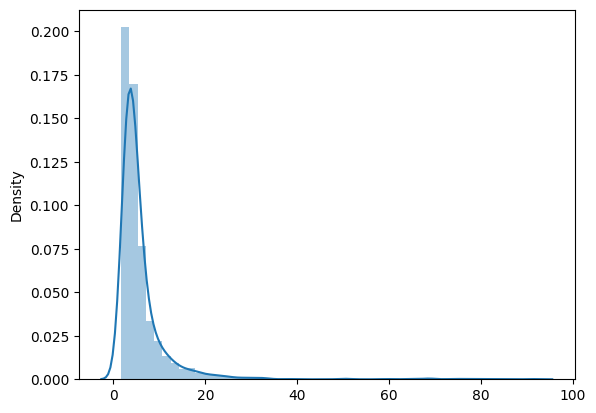

In [82]:
sns.distplot(avg_codisp);

Text(0.5, 0.92, 'CoDisp above 99.5th percentile')

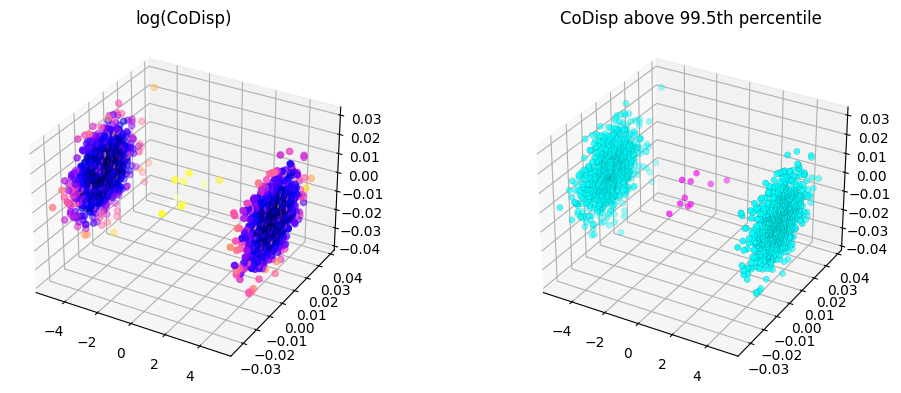

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

threshold = avg_codisp.nlargest(n=10).min()

# Log를 씌워서 분포를 확인하기 위함.
fig = plt.figure(figsize=(12,4.5))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2],
                c=np.log(avg_codisp.sort_index().values),
                cmap='gnuplot2')
plt.title('log(CoDisp)')

# 경계를 벗어나는 값을 시각화
ax = fig.add_subplot(122, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2],
                linewidths=0.1, edgecolors='k',
                c=(avg_codisp >= threshold).astype(float),
                cmap='cool')
plt.title('CoDisp above 99.5th percentile')

In [84]:
# Streaming example
# 데이터가 유입될 때마다 모델을 업데이트 함.
import numpy as np
import rrcf

# Generate data
n = 730
A = 50
center = 100
phi = 30
T = 2 * np.pi/100
t = np.arange(n)
sin = A*np.sin(T*t-phi*T) + center
sin[235:255] = 80

In [85]:
# Set tree parameters
num_trees = 40
shingle_size = 4    # 과거의 값을 포함하는 정도(Sliding Window)
tree_size = 256

# Create a forest of empty trees
forest = []
for _ in range(num_trees):
    tree = rrcf.RCTree()
    forest.append(tree)

In [86]:
# Use the "shingle" generator to create rolling window
points = rrcf.shingle(sin, size=shingle_size)

# Create a dict to store anomaly score of each point
avg_codisp = {}

# For each shingle...
for index, point in enumerate(points):
    
    # For each tree in the forest...
    for tree in forest:
        # If tree is above permitted size...
        if len(tree.leaves) > tree_size:
            # Drop the oldest point (FIFO)
            tree.forget_point(index - tree_size)
        # Insert the new point into the tree
        tree.insert_point(point, index=index)
        # Compute codisp on the new point...
        new_codisp = tree.codisp(index)
        # And take the average over all trees
        if not index in avg_codisp:
            avg_codisp[index] = 0
        avg_codisp[index] += new_codisp / num_trees

Text(0.5, 1.0, 'Sine wave with injected anomaly (red) and anomaly score (blue)')

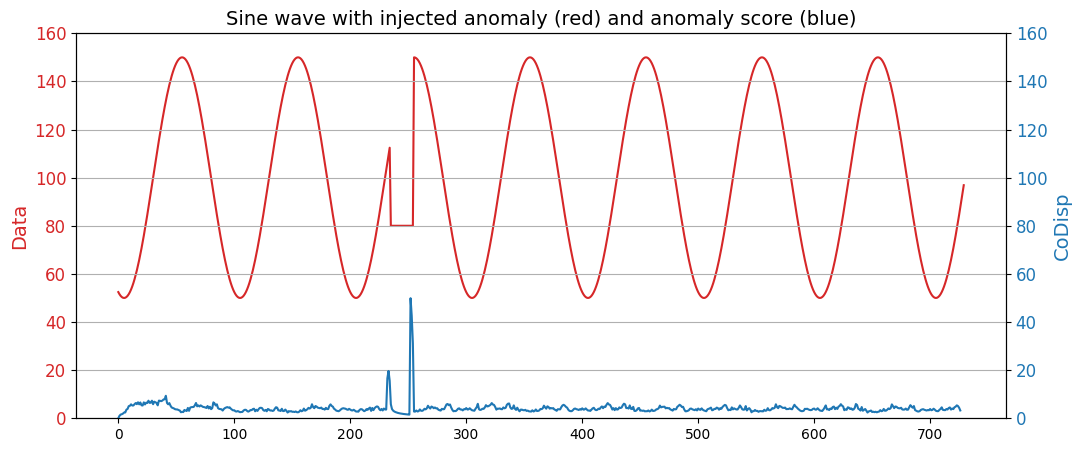

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 5))

color = 'tab:red'
ax1.set_ylabel('Data', color=color, size=14)
ax1.plot(sin, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.set_ylim(0,160)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CoDisp', color=color, size=14)
ax2.plot(pd.Series(avg_codisp).sort_index(), color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)
ax2.grid('off')
ax2.set_ylim(0, 160)
plt.title('Sine wave with injected anomaly (red) and anomaly score (blue)', size=14)

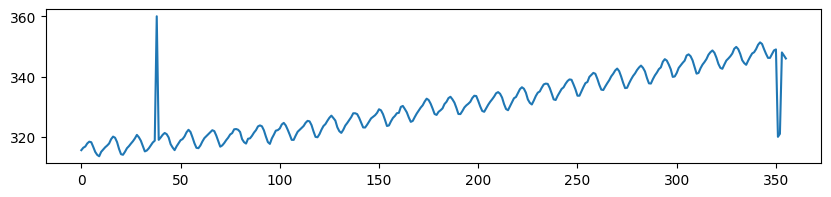

In [88]:
# 위의 S-H-ESD에서 대응되지 못했던 데이터를 적용해보자.
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,
       317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,
       318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,360, 
       319,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,318.87,319.25,320.13,
       321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,
       322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,
       322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,
       322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,
       320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,
       319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,
       321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,
       324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,
       326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,
       328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,
       330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,
       331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,
       334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,
       336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,
       337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,
       337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,
       337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,
       336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,348.07,349.12,350.55,351.34,350.80,349.10,347.54,346.20,346.20,347.44,348.67,
       349, 320, 321, 348, 347, 346]

plt.figure(figsize=(10, 2))
plt.plot(co2)
plt.show();

In [89]:
# Set tree parameters
num_trees = 40
shingle_size = 4    # 과거의 값을 포함하는 정도(Sliding Window)
tree_size = 256

# Create a forest of empty trees
forest = []
for _ in range(num_trees):
    tree = rrcf.RCTree()
    forest.append(tree)
    
# Use the "shingle" generator to create rolling window
points = rrcf.shingle(co2, size=shingle_size)

# Create a dict to store anomaly score of each point
avg_codisp = {}

# For each shingle...
for index, point in enumerate(points):
    # For each tree in the forest
    for tree in forest:
        # If tree is above permitted size
        if len(tree.leaves) > tree_size:
            # Drop the oldest point (FIFO)
            tree.forget_point(index - tree_size)
        # Insert the new point into the tree
        tree.insert_point(point, index=index)
        # Compute codisp on the new point...
        new_codisp = tree.codisp(index)
        # And take the average over all trees
        if not index in avg_codisp:
            avg_codisp[index] = 0
        avg_codisp[index] += new_codisp / num_trees

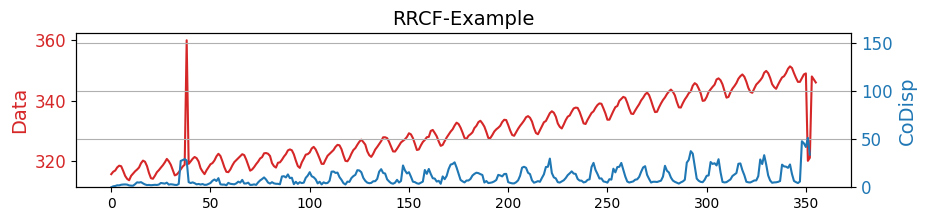

In [90]:
fig, ax1 = plt.subplots(figsize=(10, 2))

color = 'tab:red'
ax1.set_ylabel('Data', color=color, size=14)
ax1.plot(co2, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
# ax1.set_ylim(0,160)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CoDisp', color=color, size=14)
ax2.plot(pd.Series(avg_codisp).sort_index(), color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)
ax2.grid('off')
ax2.set_ylim(0, 160)
plt.title('RRCF-Example', size=14)
plt.show();

## Ch06-(1). 🎯 STL(Sesonal and Trend decompostion usinf Loess)
___
<pre>
* 정의
# 시계열 분해를 이용하여 Trend와 Sesonality를 제거하고 남는 Residual을 활용하여 시계열 데이터 이상 탐지

# 시계열 분해 : 시계열을 몇 가지 성분을 나누어 이해하는 작업 (※ trend, sesonality, cycle)
🕝 시계열 분해 역사
(1) Classical Decomposition : 전통적인 시계열 분해, MA 구할 시 앞뒤 데이터 삭제, Robust하지 못함
(2) X11 : 미국 인구 조사국/캐나다 통계청 개발, 양 끝점 삭제 해결, 휴일 효과 등 캘린더 고려, 갑작스런 변화에 유연하게 대응
(3) SEATS : 스페인 은행 개발, 분기별, 월별 데이터에서만 작동

# 다양한 상황에서 사용할 수 있는 강력한 시계열 분해 기법
# SEAT와 X11과 다르게 월별, 분기별 데이터 포함 어떤 종류의 계절성도 다룰 수 있음
# 계절적인 성분이 시간에 따라 변해도 Hyper parameter를 통해 반영할 수 있음
</pre>

<img src = "https://drive.google.com/uc?id=1sxpqeudcgqZ8hreIEe8e8-l_Qay6QRDl">

<pre>
* 장단점
# [장점] 분기별, 월별, 일별 분해 모두 가능 
# [장점] MA(Moving Avg) 방식이 아니기 때문에 데이터 유실 없음
# [장점] 돌발스런 이상치에 대해 추세, 주기에 영향을 미치지 않음 

# [단점] 캘린더 데이터를 반영하지 못함, 일별 데이터로 변환하여 넣어줘야함
# [단점] 덧셈 분해 기능만 제공

* 덧셈 분해 (additive decomposition)  
 - y = S + T + R

 Trend가 일정함에 따라 변동폭이 동일하면 덧셈 분해(additive decomposition) 
 (※ Trend와 Seasonal의 관계가 없다.)

* 곱셈 분해 (multiplicative decomposition)  
 - y = S x T x R

  Trend가 상승함에 따라 변동폭이 변화하면 곱셈 분해(multiplicative decomposition)    
 (※ Trend변화에 따라 Seasonal의 관계가 있다.)


* 사용방법
# !pip install statsmodels==0.12.1 (※ 오류 발생시 version 교체)
# from statsmodels.tsa.seasonal import STL
# 주기(Seasonal의) 결정
# Seasonal 및 Trend 제거 후 Residual 추출
# Residual 정규성 검증 및 3-sigma rule 적용 이상 탐지

* 현업사례
# 시계열(Time-series), 시간 종속 데이터 이상 탐지
</pre>

### Ch06-(1). ✍ Toy data 실습
___

In [91]:
# ▶ Toy data 생성
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,318.87,319.25,320.13,321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,348.07,349.12,350.55,351.34,350.80,349.10,347.54,346.20,346.20,347.44,348.67,
400, 450, 460]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")
co2.head()

2022-01-31    315.58
2022-02-28    316.39
2022-03-31    316.79
2022-04-30    317.82
2022-05-31    318.39
Freq: M, Name: CO2, dtype: float64

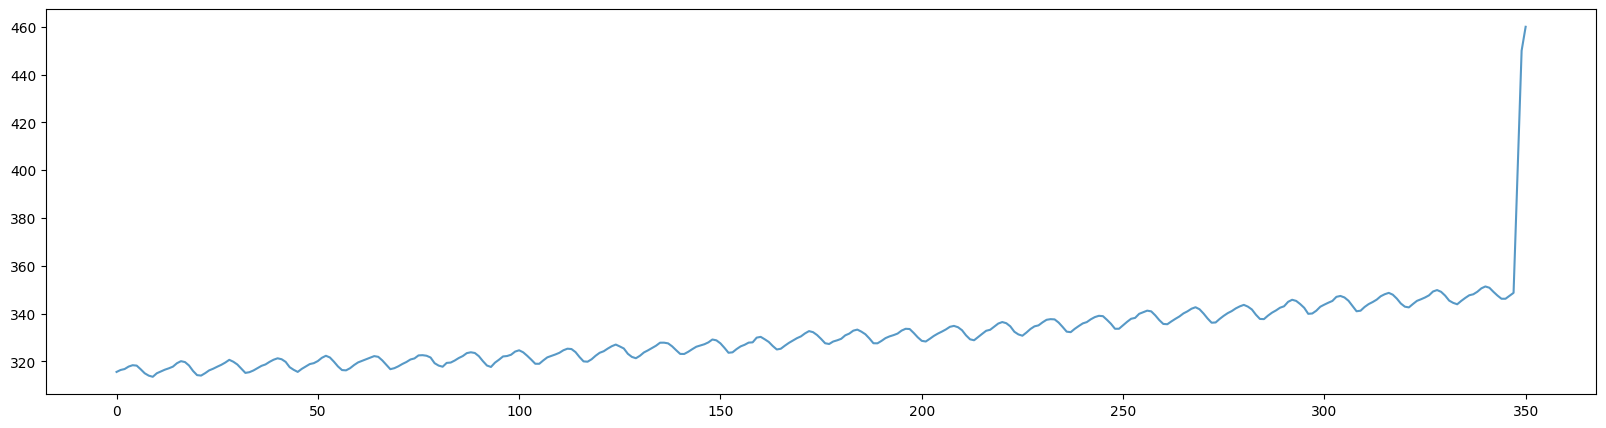

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
fig = plt.figure(figsize=(20,5))
plt.plot(co2.values, linewidth=1.5, alpha=0.75, label='Close');

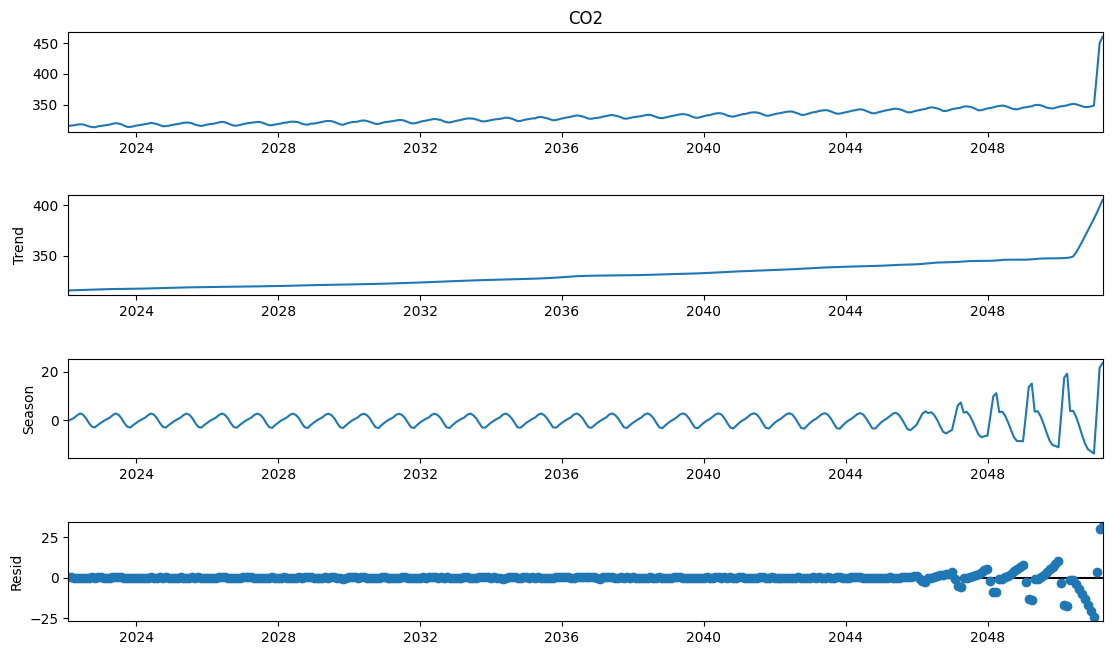

In [93]:
from statsmodels.tsa.seasonal import STL
# Odd num : seasonal = 13(연도별) / seasonal = 5(분기별) / seasonal = 7(주별)
stl = STL(co2, seasonal=13)
res = stl.fit()
fig = res.plot()
fig.set_size_inches(12, 7)

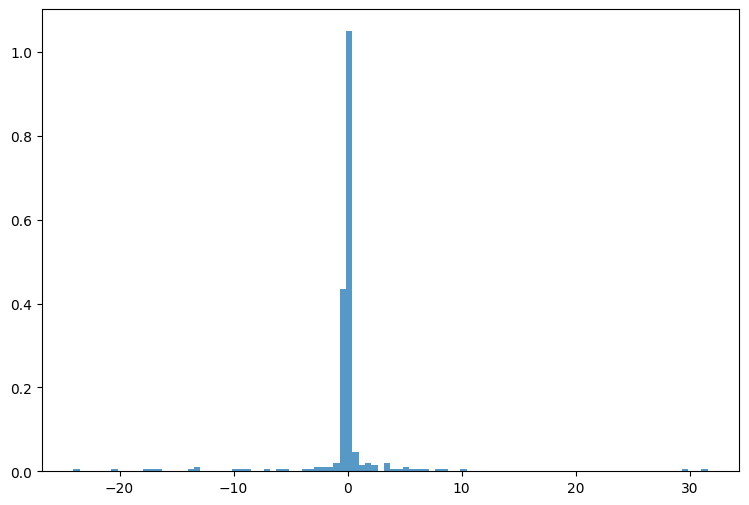

In [94]:
# Residual(잔차)의 분포 확인
fig, ax = plt.subplots(figsize=(9,6))
_ = plt.hist(res.resid, 100, density=True, alpha=0.75)

In [95]:
# Ztest를 통한 정규성 검증(Nomality Test)
# Ztest : 정규분포를 가정하며, 추출된 표본이 동일 모집단(정규분포)에 속하는지 가설 검증하기 위해 사용 
# (※ p-value가 0.05 이상이면 정규성을 따름)

from statsmodels.stats.weightstats import ztest
r = res.resid.values
st, p = ztest(r)
print(st,p)  

-0.6506146684262828 0.5152952591180103


In [96]:
# 평균과 표준편차 출력
mu, std = res.resid.mean(), res.resid.std()
print("평균:", mu, "표준편차:", std)

# 3-sigma(표준편차)를 기준으로 이상치 판단
print("이상치 갯수:", len(res.resid[(res.resid>mu+3*std)|(res.resid<mu-3*std)]))
# 이상치 갯수: 10

평균: -0.13473483767402747 표준편차: 3.879802434937742
이상치 갯수: 10


In [97]:
# 이상 데이터 확인
co2[res.resid[(res.resid>mu+3*std)|(res.resid<mu-3*std)].index]

2049-02-28    346.72
2049-03-31    347.63
2050-02-28    348.07
2050-03-31    349.12
2050-09-30    346.20
2050-10-31    346.20
2050-11-30    347.44
2050-12-31    348.67
2051-02-28    450.00
2051-03-31    460.00
Name: CO2, dtype: float64

In [98]:
# 이상 데이터 위치 확인
co2_df = co2.reset_index()
print(co2_df[co2_df['index'] == '2049-02-28'].index)
print(co2_df[co2_df['index'] == '2049-03-31'].index)
print(co2_df[co2_df['index'] == '2050-02-28'].index)
print(co2_df[co2_df['index'] == '2050-03-31'].index)
print(co2_df[co2_df['index'] == '2050-09-30'].index)
print(co2_df[co2_df['index'] == '2050-10-31'].index)
print(co2_df[co2_df['index'] == '2050-11-30'].index)
print(co2_df[co2_df['index'] == '2050-12-31'].index)
print(co2_df[co2_df['index'] == '2051-02-28'].index)
print(co2_df[co2_df['index'] == '2051-03-31'].index)

Int64Index([325], dtype='int64')
Int64Index([326], dtype='int64')
Int64Index([337], dtype='int64')
Int64Index([338], dtype='int64')
Int64Index([344], dtype='int64')
Int64Index([345], dtype='int64')
Int64Index([346], dtype='int64')
Int64Index([347], dtype='int64')
Int64Index([349], dtype='int64')
Int64Index([350], dtype='int64')


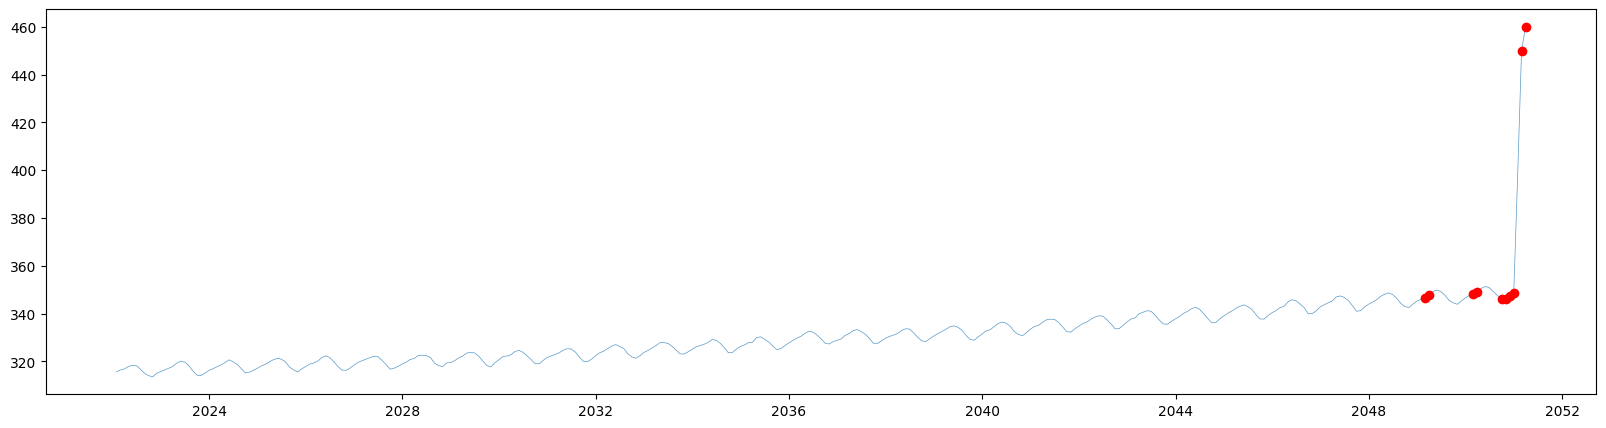

In [99]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['default'])
fig = plt.figure(figsize=(20,5))

plt.plot(co2, linewidth=0.5, alpha=0.75, label='Close');
plt.plot(co2, 'or', markevery=[325, 326, 337, 338, 344, 345, 346, 347, 349, 350]);

## Ch06-(2). 🎯 Holt-winters
___
<pre>
* 정의

# STL의 단점을 보완하고자 고안된 방법으로 STL의 Trend 속성과 Seasonality 속성에 Exponential Smoothing을 적용한 알고리즘
# Holt-Winters를 활용해 시계열 데이터를 예측하고, brutlag 알고리즘 활용 신뢰구간을 설정하여 이상 탐지
  (brutlag 알고리즘: 신뢰구간을 고정적으로 가져가는 것이 아닌 유동적으로 설정하는 알고리즘, 잔차분석법과 비슷함)
# Holt-Winters 모델은 단순하면서도 널리 활용되어지는 시계열 분석도구로서 많은 시계열예측의 기준모델로서 쓰이고 있음

# STL은 강력한 시계열 분해 방법이지만, 지속적으로 증가하는(multiplicative) 이상 Point 탐지에 대해서 약점을 가지고 있음
# 가까운 데이터는 가중치를 높게 할당하고 오래전 데이터는 가중치를 작게 할당하여 이용 미래의 x값을 예측
</pre>

<img src = "https://drive.google.com/uc?id=1WqLGazewaYeW_HlMq4jse-_TPngRKBRq">

<pre>
* 장단점
# [장점] 장기간 예측이 가능
# [장점] Hyper parameter 조정을 통해 이상 허용 오차에 대해 유연하게 대응
# [장점] 연산량이 적음, 큰 데이터 세트에 대해서 리소스 절약, 자동화 가능
# [장점] 계절성을 고려한 이상 탐지 가능 

# [단점] 단변량 데이터에 대해서만 적용 가능, 상관관계 고려 X
# [단점] 계절성이 없는 데이터에 대해서는 성능 저조
# [단점] 변동이 적은 계절성 데이터에 대해서는 민감하게 탐지할 우려
# [단점] Brutlag 알고리즘의 파라미터를 직접 찾아야 함

* 사용방법

# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# ES(Exponential Smoothing)을 통해 전체 데이터셋을 학습하고 예측
# Brutlag Algorithm 활용 신뢰구간 설정
# 신뢰구간 활용 이상 Point 탐지

* 적용사례

# 시계열(Time-series), 시간 종속 데이터 수요 예측 및 이상 탐지
</pre>

### Ch06-(2). ✍ Toy data 실습
___

In [100]:
import pandas as pd
co2 = [315.58,316.39,316.79,317.82,318.39,318.22,316.68,315.01,314.02,313.55,315.02,315.75,316.52,317.10,317.79,319.22,320.08,319.70,318.27,315.99,314.24,314.05,315.05,316.23,316.92,317.76,318.54,319.49,320.64,319.85,318.70,316.96,315.17,315.47,316.19,317.17,318.12,318.72,319.79,320.68,321.28,320.89,319.79,317.56,316.46,315.59,316.85,317.87,350, 318.87,319.25,320.13,321.49,322.34,321.62,319.85,317.87,316.36,316.24,317.13,318.46,319.57,320.23,320.89,321.54,322.20,321.90,320.42,318.60,316.73,317.15,317.94,318.91,319.73,320.78,321.23,322.49,322.59,322.35,321.61,319.24,318.23,317.76,319.36,319.50,320.35,321.40,322.22,323.45,323.80,323.50,322.16,320.09,318.26,317.66,319.47,320.70,322.06,322.23,322.78,324.10,324.63,323.79,322.34,320.73,319.00,318.99,320.41,321.68,322.30,322.89,323.59,324.65,325.30,325.15,323.88,321.80,319.99,319.86,320.88,322.36,323.59,324.23,325.34,326.33,327.03,326.24,325.39,323.16,321.87,321.31,322.34,323.74,324.61,325.58,326.55,327.81,327.82,327.53,326.29,324.66,323.12,323.09,324.01,325.10,326.12,326.62,327.16,327.94,329.15,328.79,327.53,325.65,323.60,323.78,325.13,326.26,326.93,327.84,327.96,329.93,330.25,329.24,328.13,326.42,324.97,325.29,326.56,327.73,328.73,329.70,330.46,331.70,332.66,332.22,331.02,329.39,327.58,327.27,328.30,328.81,329.44,330.89,331.62,332.85,333.29,332.44,331.35,329.58,327.58,327.55,328.56,329.73,330.45,330.98,331.63,332.88,333.63,333.53,331.90,330.08,328.59,328.31,329.44,330.64,331.62,332.45,333.36,334.46,334.84,334.29,333.04,330.88,329.23,328.83,330.18,331.50,332.80,333.22,334.54,335.82,336.45,335.97,334.65,332.40,331.28,330.73,332.05,333.54,334.65,335.06,336.32,337.39,337.66,337.56,336.24,334.39,332.43,332.22,333.61,334.78,335.88,336.43,337.61,338.53,339.06,338.92,337.39,335.72,333.64,333.65,335.07,336.53,337.82,338.19,339.89,340.56,341.22,340.92,339.26,337.27,335.66,335.54,336.71,337.79,338.79,340.06,340.93,342.02,342.65,341.80,340.01,337.94,336.17,336.28,337.76,339.05,340.18,341.04,342.16,343.01,343.64,342.91,341.72,339.52,337.75,337.68,339.14,340.37,341.32,342.45,343.05,344.91,345.77,345.30,343.98,342.41,339.89,340.03,341.19,342.87,343.74,344.55,345.28,347.00,347.37,346.74,345.36,343.19,340.97,341.20,342.76,343.96,344.82,345.82,347.24,348.09,348.66,347.90,346.27,344.21,342.88,342.58,343.99,345.31,345.98,346.72,347.63,349.24,349.83,349.10,347.52,345.43,344.48,343.89,345.29,346.54,347.66,360.07,349.12,350.55,351.34,350.80,349.10,320.54,346.20,346.20,347.44,348.67]
co2 = pd.Series(co2, index=pd.date_range("1-1-2022", periods=len(co2), freq="M"), name="CO2")
co2 = pd.DataFrame(co2)
co2.head()

,CO2
2022-01-31,315.58
2022-02-28,316.39
2022-03-31,316.79
2022-04-30,317.82
2022-05-31,318.39


In [101]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

temp_df = co2
train_df = co2

# ExponentialSmoothing(ES) 모델을 만들어 학습하고 전체 데이터에 대해 예측한다.
# additive는 경향성이 일정함을 의미하고, 경향성 변동폭이 있을 때는 multiplicative를 사용
# Sensonal과 Trend간의 상관관계가 보일 때는 Multiplicative를 이용하고 그렇지 않을 때는 Additive를 이용함
model = ExponentialSmoothing(train_df, trend='additive', seasonal='additive')
fit1 = model.fit()

In [102]:
prediction = model.predict(params=fit1.params, start=temp_df.index[0], end=temp_df.index[-1])

In [103]:
"""Brutlag Algorithm"""
PERIOD = 12        # The given time series has seasonal_period=12
GAMMA = 0.4        # the seasonility component
SF = 1.96          # brutlag scaling factor for the confidence bands.
UB = []            # upper bound or upper confidence band
LB = []            # lower bound or lower confidence band

# 실측치와 예측치를 비교하는 자료구조
difference_array = []
dt = []
difference_table = {"actual": temp_df, "predicted": prediction, "difference": difference_array, "UB": UB, "LB": LB}

# brutlag 알고리즘
# 12개월 이전의 실측/결측 차이에 0.6, 이번달 차이에 0.4 정도의 가중치를 주어 저장
for i in range(len(prediction)):
    diff = temp_df.iloc[i]-prediction[i]
    if i < PERIOD:
        dt.append(GAMMA*abs(diff))
    else:
        dt.append(GAMMA*abs(diff) + (1-GAMMA)*dt[i-PERIOD])

# 저장된 실측/결측 차이를 예측치의 95% 신뢰구간(1.96)으로 반영하여 Upper/Lower Band 계산
    difference_array.append(diff)
    UB.append(prediction[i]+SF*dt[i])
    LB.append(prediction[i]-SF*dt[i])

In [104]:
"""Classification of data points as either normal or anomaly"""
normal = []
normal_date = []
anomaly = []
anomaly_date = []

# 신뢰구간을 벗어나는지 판단하여 normal, anomaly 결정
for i in range(len(temp_df.index)):
    if ((UB[i] <= temp_df.iloc[i]).bool() or (LB[i] >= temp_df.iloc[i]).bool()) and i > PERIOD:
        anomaly_date.append(temp_df.index[i])
        anomaly.append(temp_df.iloc[i][0])
    else:
        normal_date.append(temp_df.index[i])
        normal.append(temp_df.iloc[i][0])
        
anomaly = pd.DataFrame({"date": anomaly_date, "value": anomaly})
anomaly.set_index('date', inplace=True)
normal = pd.DataFrame({"date": normal_date, "value": normal})
normal.set_index('date', inplace=True)

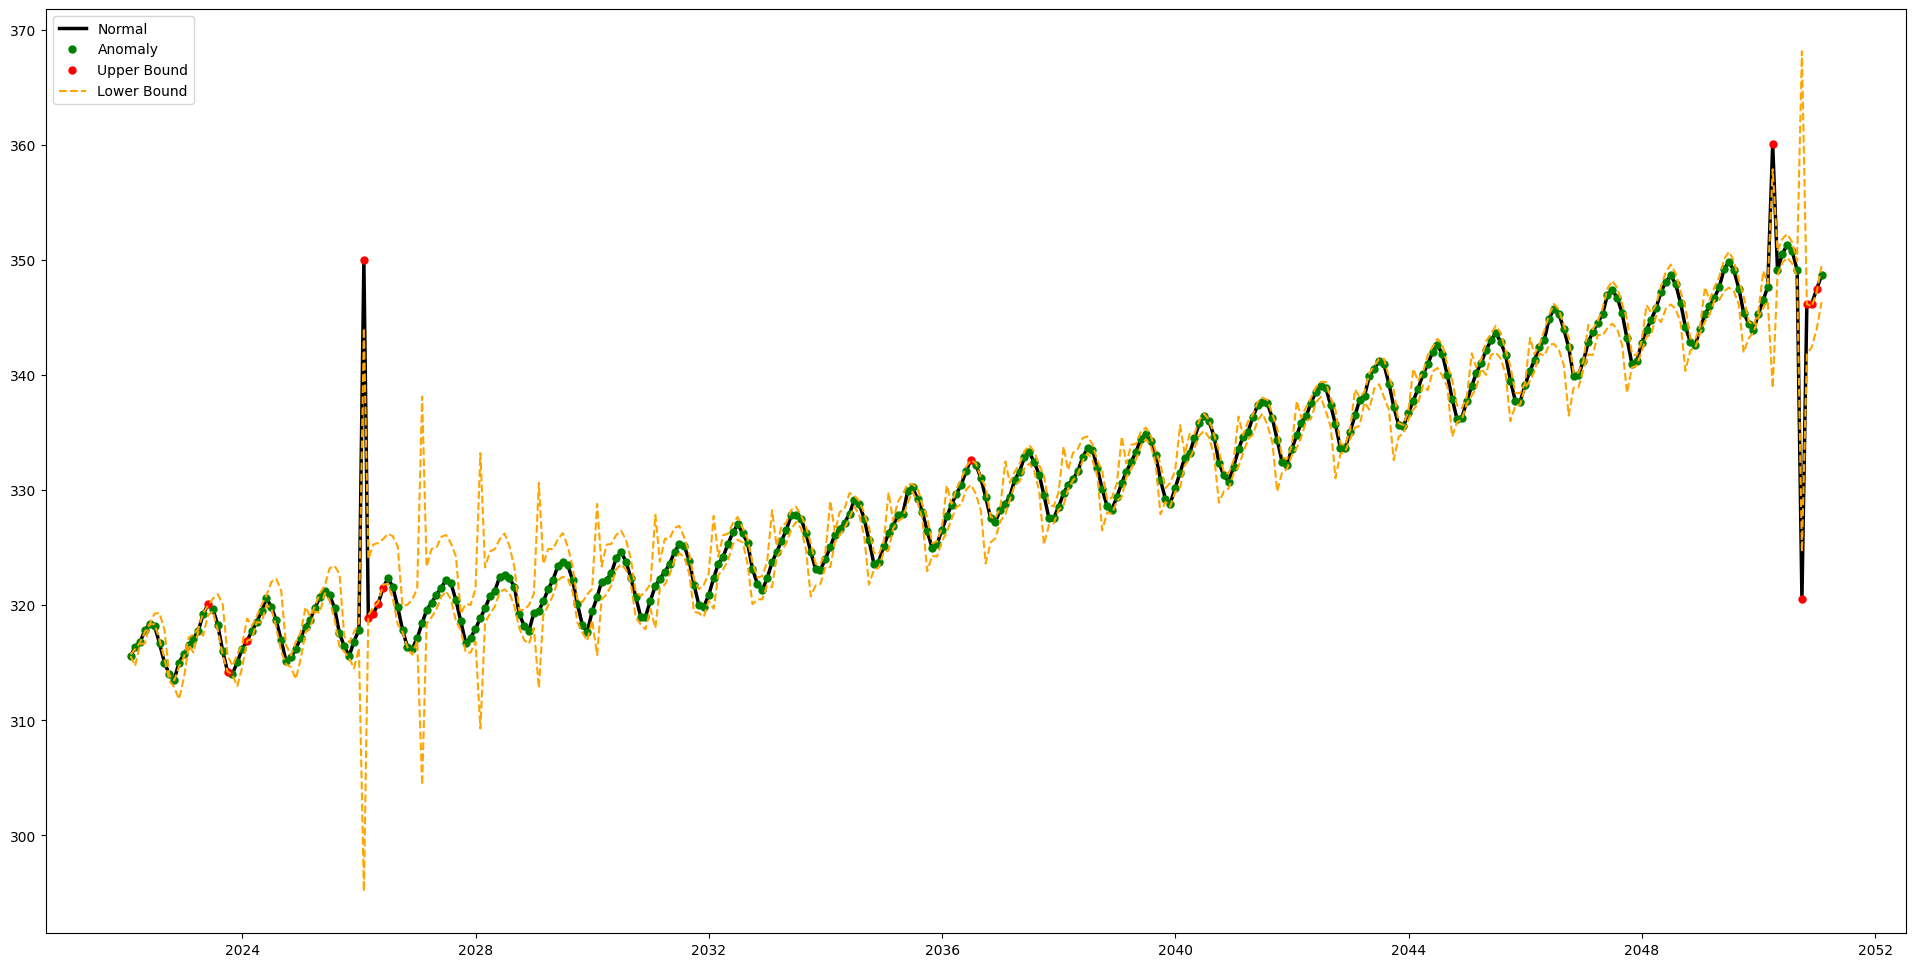

In [105]:
import matplotlib.pyplot as plt
# plotting
plt.figure(figsize=(24,12))
plt.plot(co2.index, co2.values, color='k', linewidth=2.5)
plt.plot(normal.index, normal, 'o', color='green', markersize=5)
plt.plot(anomaly.index, anomaly, 'o', color='red', markersize=5)
plt.plot(temp_df.index, UB, linestyle='--', color='orange')
plt.plot(temp_df.index, LB, linestyle='--', color='orange')
plt.legend(['Normal', 'Anomaly', 'Upper Bound', 'Lower Bound'])
plt.show()

In [106]:
# 이상 데이터 확인
anomaly

,value
date,
2023-05-31,320.08
2023-09-30,314.24
2024-01-31,316.92
2026-01-31,350.00
2026-02-28,318.87
2026-03-31,319.25
2026-04-30,320.13
2026-05-31,321.49
2036-06-30,332.66
